# **Problem Statement**

**Context**

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.



**Objective**

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.



**Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary:**

**Booking_ID:** the unique identifier of each booking

**no_of_adults:** Number of adults

**no_of_children:** Number of Children

**no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the
guest stayed or booked to stay at the hotel

**no_of_week_nights:** Number of weeknights (Monday to Friday) the guest stayed **or booked to stay at the hotel

**type_of_meal_plan:** Type of meal plan booked by the customer:
* Not Selected – No meal plan selected
* Meal Plan 1 – Breakfast
* Meal Plan 2 – Half board (breakfast and one other meal)
* Meal Plan 3 – Full board (breakfast, lunch, and dinner)

**required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)

**room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group

**lead_time:** Number of days between the date of booking and the arrival date

**arrival_year:** Year of arrival date

**arrival_month:** Month of arrival date

**arrival_date:** Date of the month

**market_segment_type:** Market segment designation.

**repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)

**no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking

**no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking

**avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

**no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

**booking_status:** Flag indicating if the booking was canceled or not.

**EDA Questions**

1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?



# **Understanding the data**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

In [ ]:
# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the data from drive
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/ML1-Coded-INNHotelsGroup.csv')

Mounted at /content/drive/


## Data Overview

In [ ]:
# viewing the first 5 rows of the data
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# viewing the last 5 rows of the data
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [ ]:
# Checking the shape of the data
data.shape

(36275, 19)

* There are **36275 rows** and **19 Columns** are present in the geven datasets.

In [ ]:
# Checking the structure and data type of the given data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* It can be observed that no columns have less entries (less than 36275 rows) which indicates that there are no missing values in the given dataset.

* There are attributes of different types (int, float, object) in the data.

* There are 14 numerical columns in the data and 5 categorical columns.

* Dependent variable is the booking_status which is of categorical type.

### Checking the statistical summary

In [ ]:
# Numerical summary statistics
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

* Maximum no. of adults is 4 with 75% times the no. of adult is 2. There is chances that mostly couples are like to book the hotel room.
* Maximum no. of children is 10.
* Average price per room is 103.42 euro with maximum price of 540 euro.
* Maximum no. of special request made by the guest is 5.
* The average lead time for bookings is around 85 days, with a wide range (minimum 0 days and maximum 443 days). This large standard deviation (85.93) indicates high variability in how far in advance bookings are made.
* The average number of previous cancellations is very low (mean = 0.0234), with some guests having canceled up to 13 times.
* On average, bookings include around 0.81 weekend nights and 2.20 weeknights, suggesting that many stays span both weekdays and weekends.

In [ ]:
# Categorical summary statistics
data.describe(include='object').T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

In [ ]:
# Viewing the unique elements in categorical columns
for col in data.select_dtypes(include='object').columns:
  print(f'{col}: {data[col].unique()}')


Booking_ID: ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
type_of_meal_plan: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status: ['Not_Canceled' 'Canceled']


In [ ]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64
--------------------------------------------------
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
--------------------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
--------------------------------------------------
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
--------------------------------------------------
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
--------------------

* There are 4 unique values in type_of_meal_plan - 'Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3'
* There are 4 unique values in room_type_reserved - Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3'
* There are 4 unique values in market_segment_type - 'Offline' 'Online' 'Corporate' 'Aviation' 'Complementary'
* There are 4 unique values in booking_status - 'Not_Canceled' 'Canceled'

* From the above observation, it can be infer that there is no
discrepancies in categorical column.
* Booking_ID column has 36275 unique values which is equall to count. And there is no significant impact on the anlysis, so the column can be dropped.

In [ ]:
# checking the number of unique values
data.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [ ]:
# Overall Statistical Summary
data.describe(include='all').T

count unique           top   freq  \
Booking_ID                                 36275  36275      INN00001      1   
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
Booking_ID                                  NaN      NaN        NaN   
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
Booking_ID                                  NaN        NaN        NaN   
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   

## Checking for missing Values

In [ ]:
# Checking for missing Values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There is no missing value in any of the column.

## checking for the duplicate values

In [ ]:
# checking for the duplicate values
data.duplicated().sum()

0

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36270    False
36271    False
36272    False
36273    False
36274    False
Length: 36275, dtype: bool

* There is no duplicate values in any of the column

## Checking for Null values in the data

In [ ]:
# Checking for Null values in the data
data.isnull().values.any()

False

* There is no null values in any of the column

## Dropping the Booking_ID Column

In [ ]:
# Write a code to drop the Booking_ID Column

data = data.drop('Booking_ID', axis=1)

# **Exploratory Data Analysis**

## The below functions need to be defined to carry out the EDA.

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

### Observation on avg_price_per_room

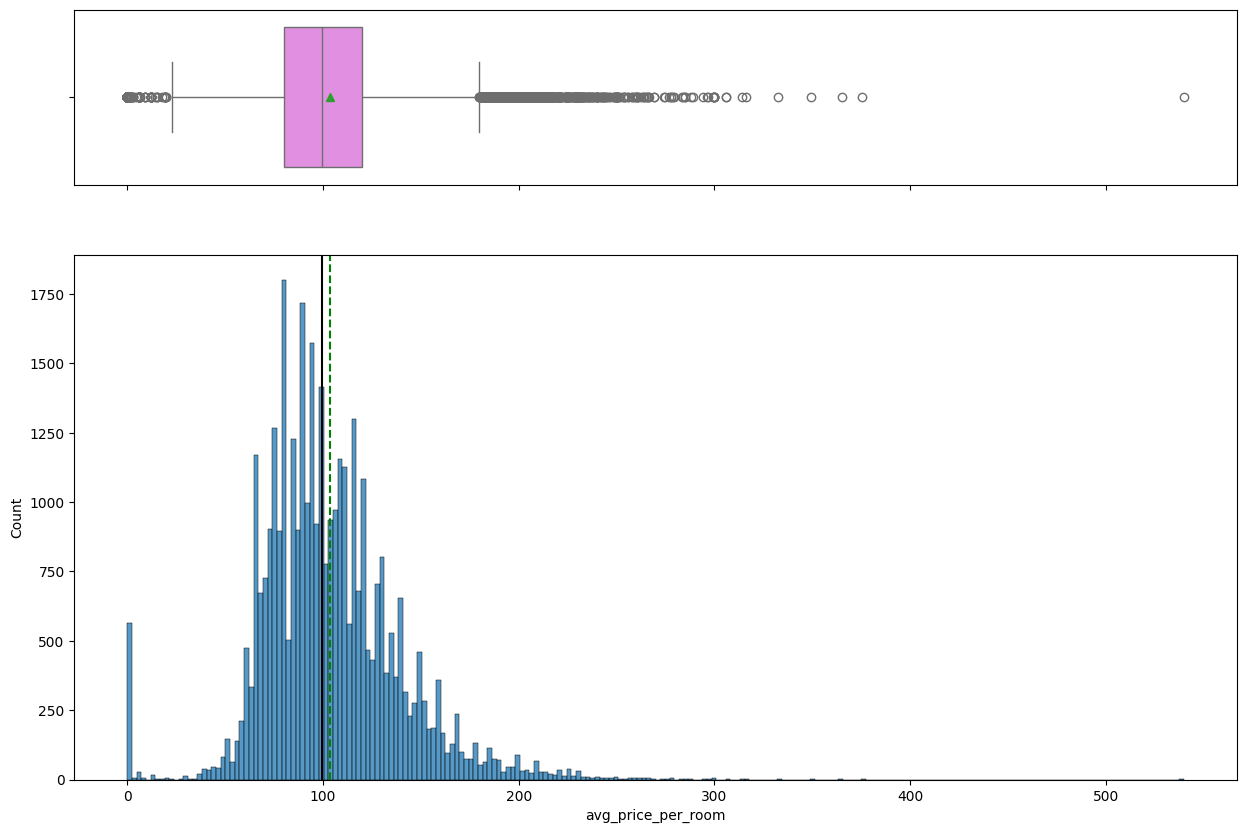

In [ ]:
histogram_boxplot(data, "avg_price_per_room")

* The histogram shows that the avg_price_per_room is heavily right-skewed.
* From the boxplot, it can be seen that there are numerous outliers on the higher end of the distribution, indicating that while most of the data is concentrated within a certain range. These outliers might represent luxury or premium offerings and should not be removed.

### Observation on lead_time

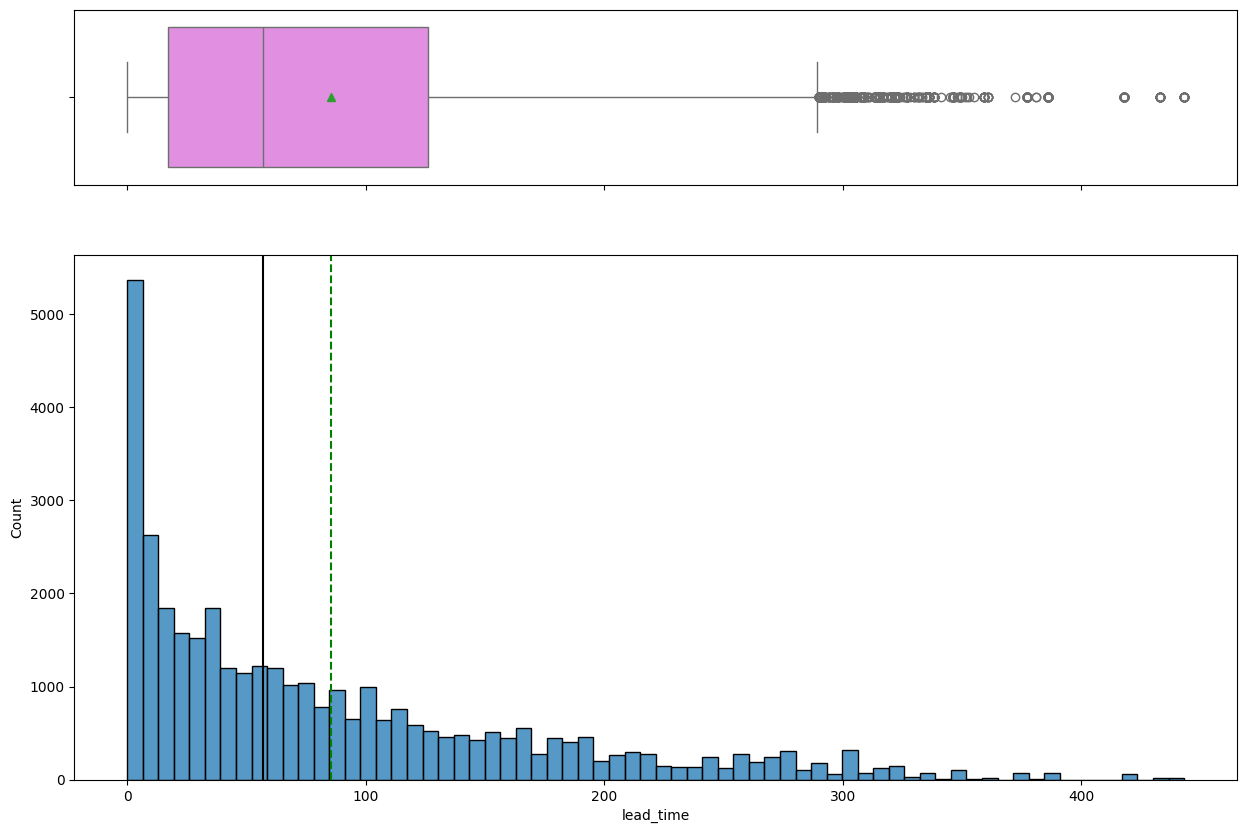

In [ ]:
histogram_boxplot(data, "lead_time")

* The histogram shows that the lead_time is also heavily right-skewed.
* From the boxplot, it can be seen that there are numerous outliers on the higher end of the distribution. These outliers represent that the some customers might booked long back from the arrival date  and hence, cannot not be removed.

### Observation on no_of_adults

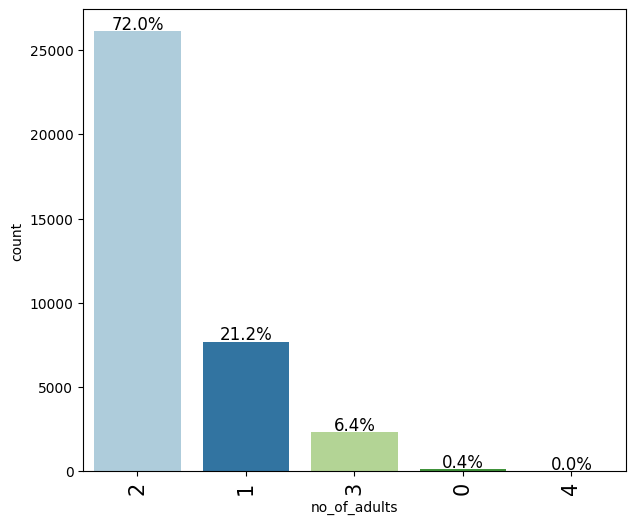

In [ ]:
labeled_barplot(data, "no_of_adults", perc=True)

* The most common group size is two adults, accounting for 72.0% of the total observations. This indicates that the majority of bookings are likely made by couples or two adults traveling together.
* The second most frequent category is bookings made by a single adult, representing 21.2% of the total. This suggests a significant portion of solo travelers or individuals booking rooms.
* Only 6.4% of the bookings are made by groups of three adults.

* Bookings with four adults is neglible(0.0%)
* Bookings with no adults (only child booking) is extremely rare, virtually nonexistent. Might good to drop those values.

### Observation on no_of_children

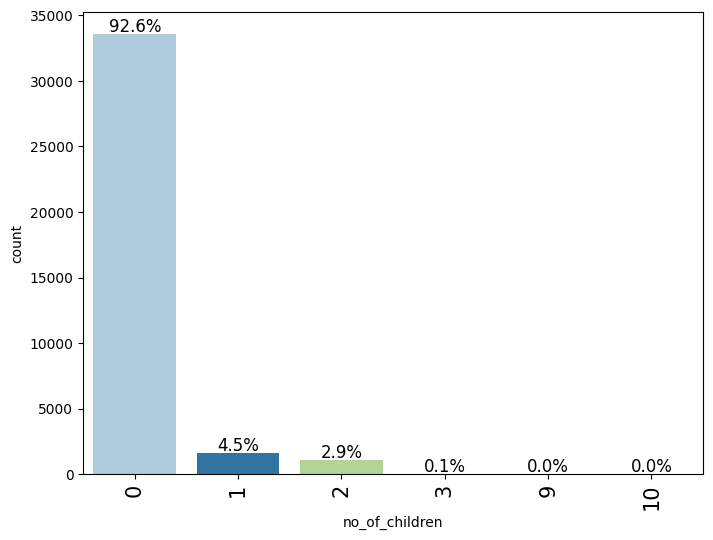

In [ ]:
labeled_barplot(data, "no_of_children", perc=True)

* Approximately 92.6% of the guests, does not have any children. This suggests that most focusing demographic is younger individuals, couples without children.
* The proportion of guests with one child is 4.5%, and those with two children is 2.9%. Guests with three or more children make up a negligible percentage (0.1% or less).



### Observation on no_of_weekend_nights

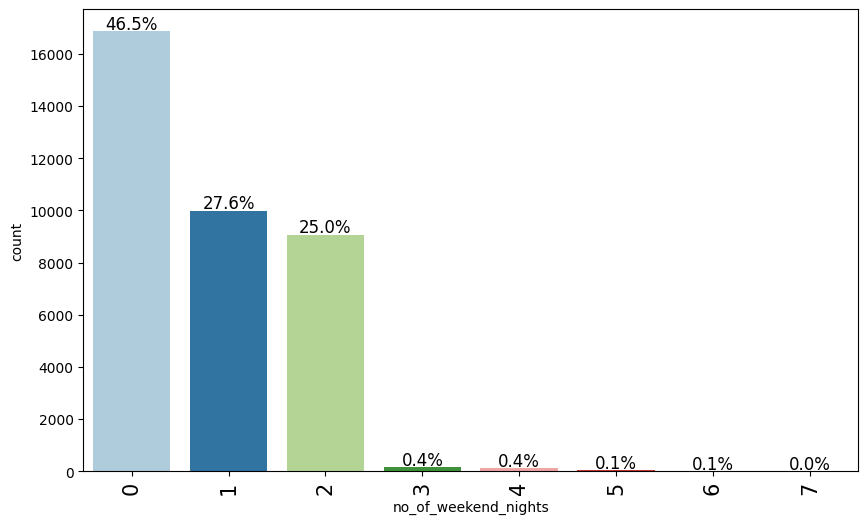

In [ ]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

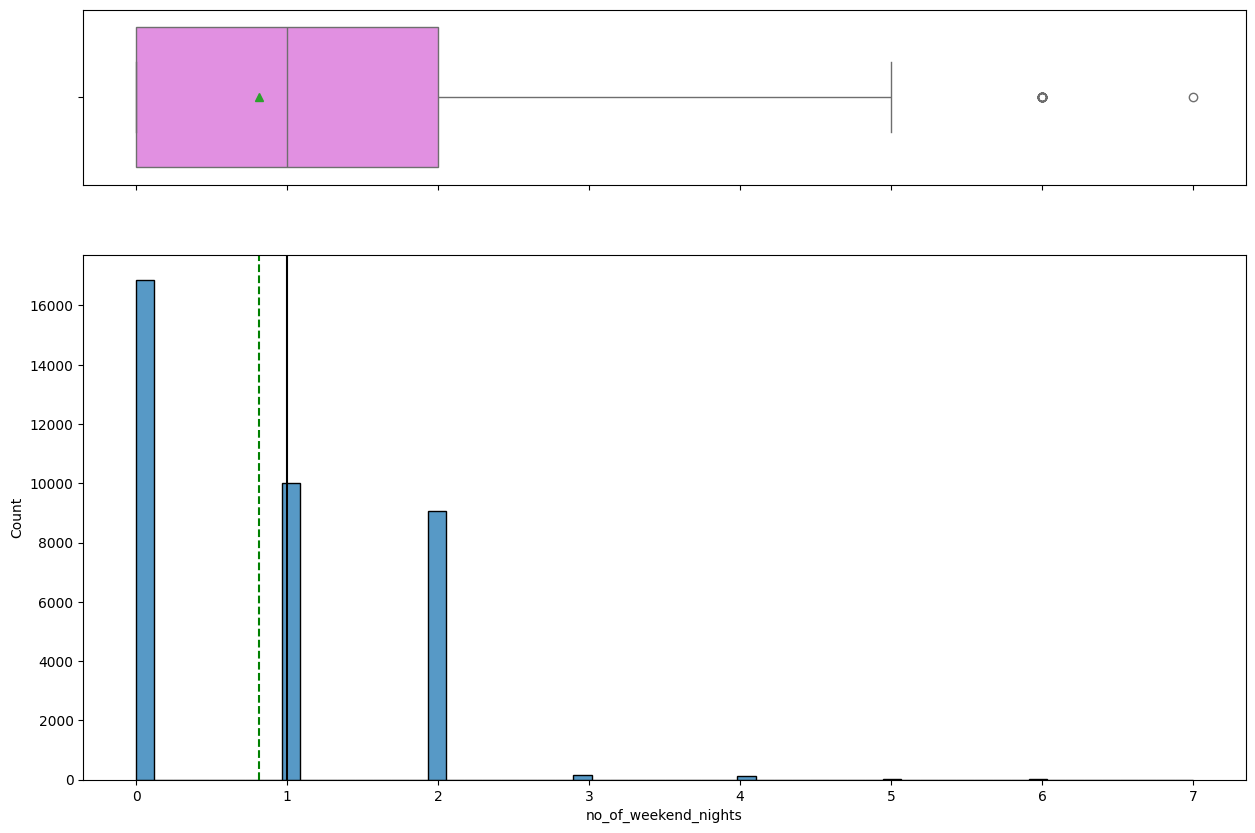

In [ ]:
histogram_boxplot(data, "no_of_weekend_nights")

* Nearly half of the dataset (46.5%) represents guests that did not spend any weekend nights. This suggests a significant portion of the customers is not utilizing services or facilities during weekends.
* The majority of weekend stays are distributed between 1 or 2 nights, with 27.6% of the population staying for one night and 25.0% staying for two nights. This suggests that short weekend getaways are common among the customers.

### Observation on no_of_week_nights

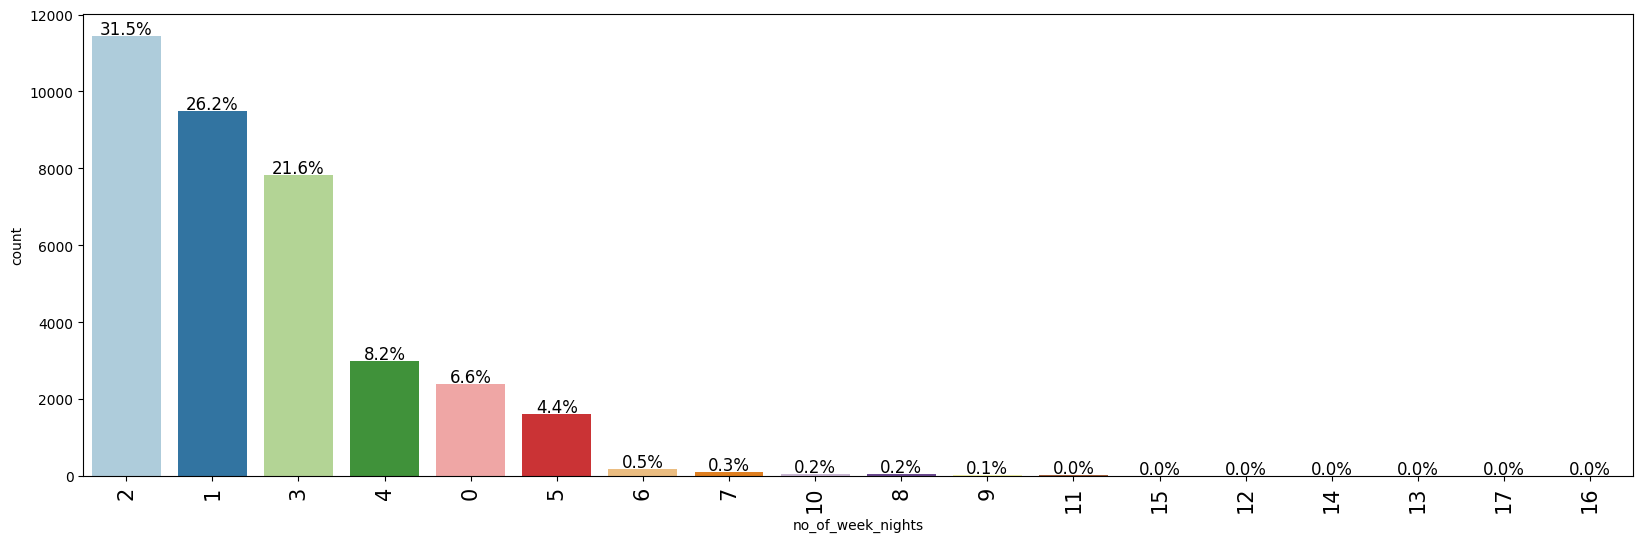

In [ ]:
labeled_barplot(data, "no_of_week_nights", perc=True)

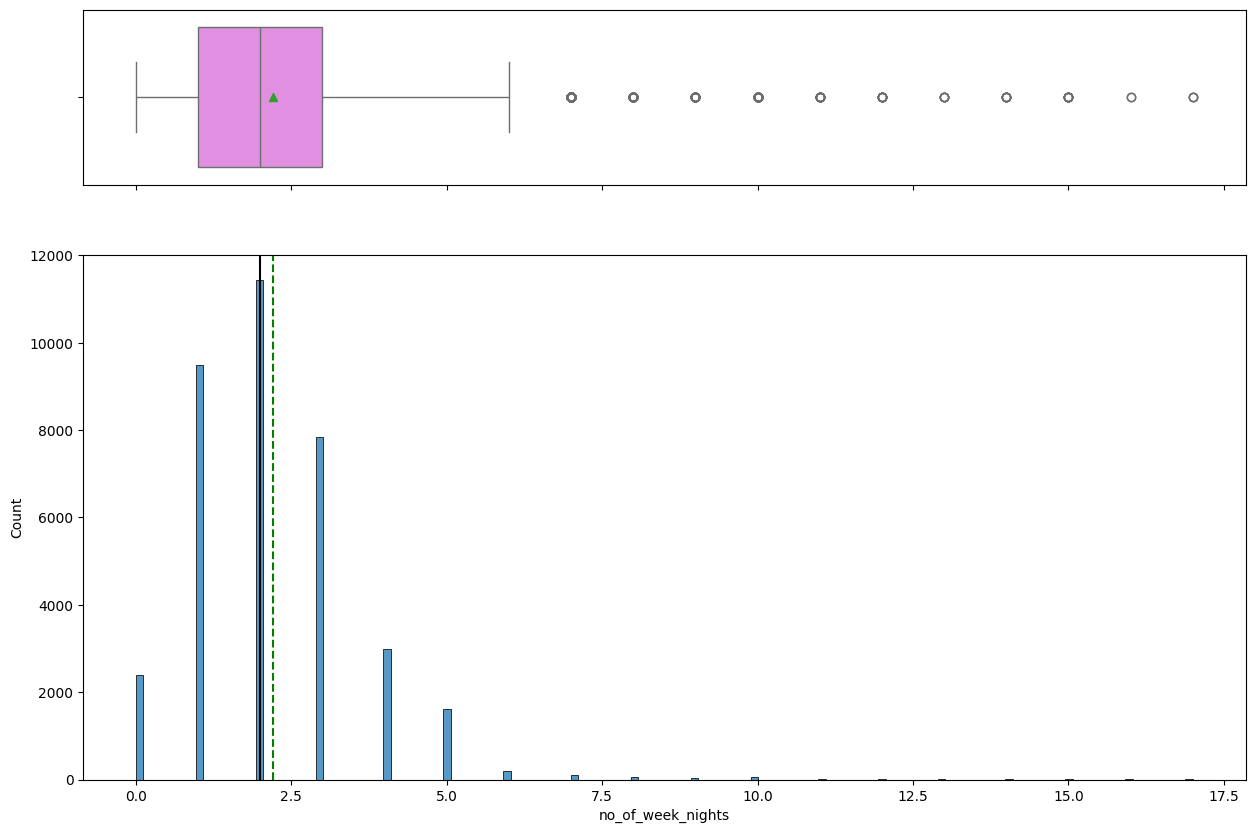

In [ ]:
histogram_boxplot(data, "no_of_week_nights")

* The highest proportion, 31.5%, of the dataset corresponds to stays of 2 week nights. This suggests that a significant number of customers prefer to spend two nights during the week.
* A considerable percentage of stays are for 1 night (26.2%) and 3 nights (21.6%), indicating that these are also popular choices among the population. The combination of 1, 2, and 3-night stays accounts for nearly 80% of the total, suggesting a strong preference for short to medium-length stays during the week.
* Stays of 4 or 5 nights are less frequent, at 8.2% and 4.4%, respectively. This suggests that extended stays during the week are less common.
* 6.6% of the data corresponds to zero week nights.
* Very few instances (less than 1% each) are observed for stays longer than 5 nights. This suggests that long-term accommodations are rare and likely do not represent the primary market

### Observation on required_car_parking_space

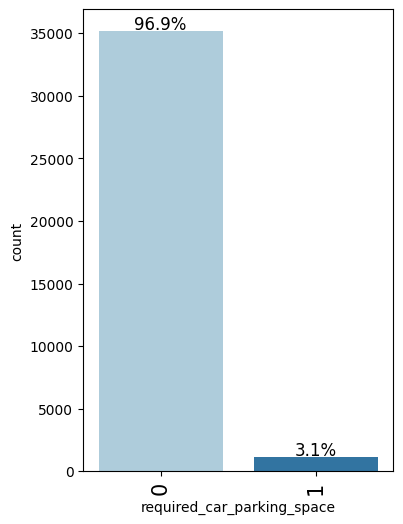

In [ ]:
labeled_barplot(data, "required_car_parking_space", perc=True)

* 96.9% of the guests do not require parking space and only 3.1% of the guests require parking space, which implies that the majority of the customers don't travel with their own car. And another possibility is Guests are coming from far distances.

### Observation on arrival_year

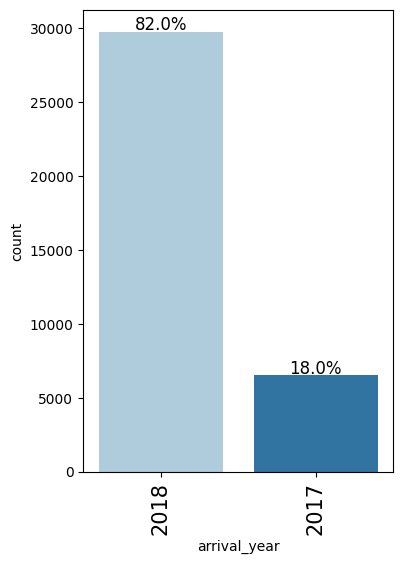

In [ ]:
labeled_barplot(data, "arrival_year", perc=True)

* About 18% of the guest booked in the year 2017 and 82% of the guest booked in the year 2018 which is a huge jump. This shows that the business is doing good.


### Observation on arrival_month

**What are the busiest months in the hotel?**

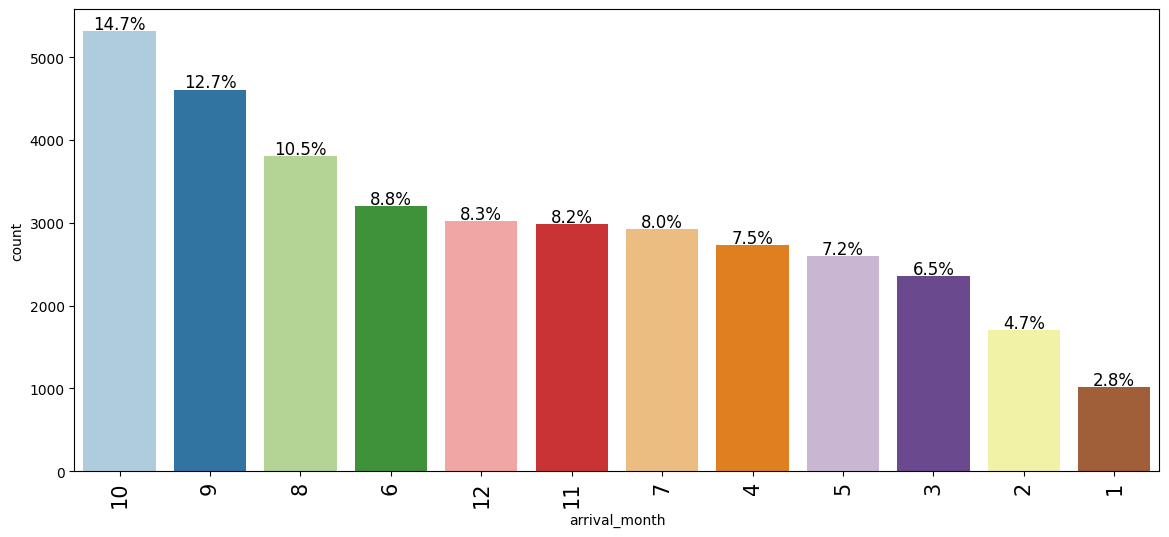

In [ ]:
labeled_barplot(data, "arrival_month", perc=True)

* The highest count of arrivals occurs in **October**, accounting for 14.7% of the total. This suggests that October is a **peak & busiest month**.

* September (12.7%) and August (10.5%) also show high arrival counts, indicating a strong third quarter.

* June, December, and November have moderate counts (8.8%, 8.3%, and 8.2% respectively), suggesting relatively steady activity during the summer and early winter months.

* The lowest counts are observed in January (2.8%) and February (4.7%), suggesting a significant dip in activity during the early part of the year.

* There is a gradual increase in arrivals starting from March (6.5%), peaking around mid-year. This gradual upward trend may indicate improving conditions or preparations for busier periods later in the year.

* April and May show similar arrival rates (7.5% and 7.2% respectively), suggesting stable activity during this transition period between spring and summer.

### Observation on arrival_date

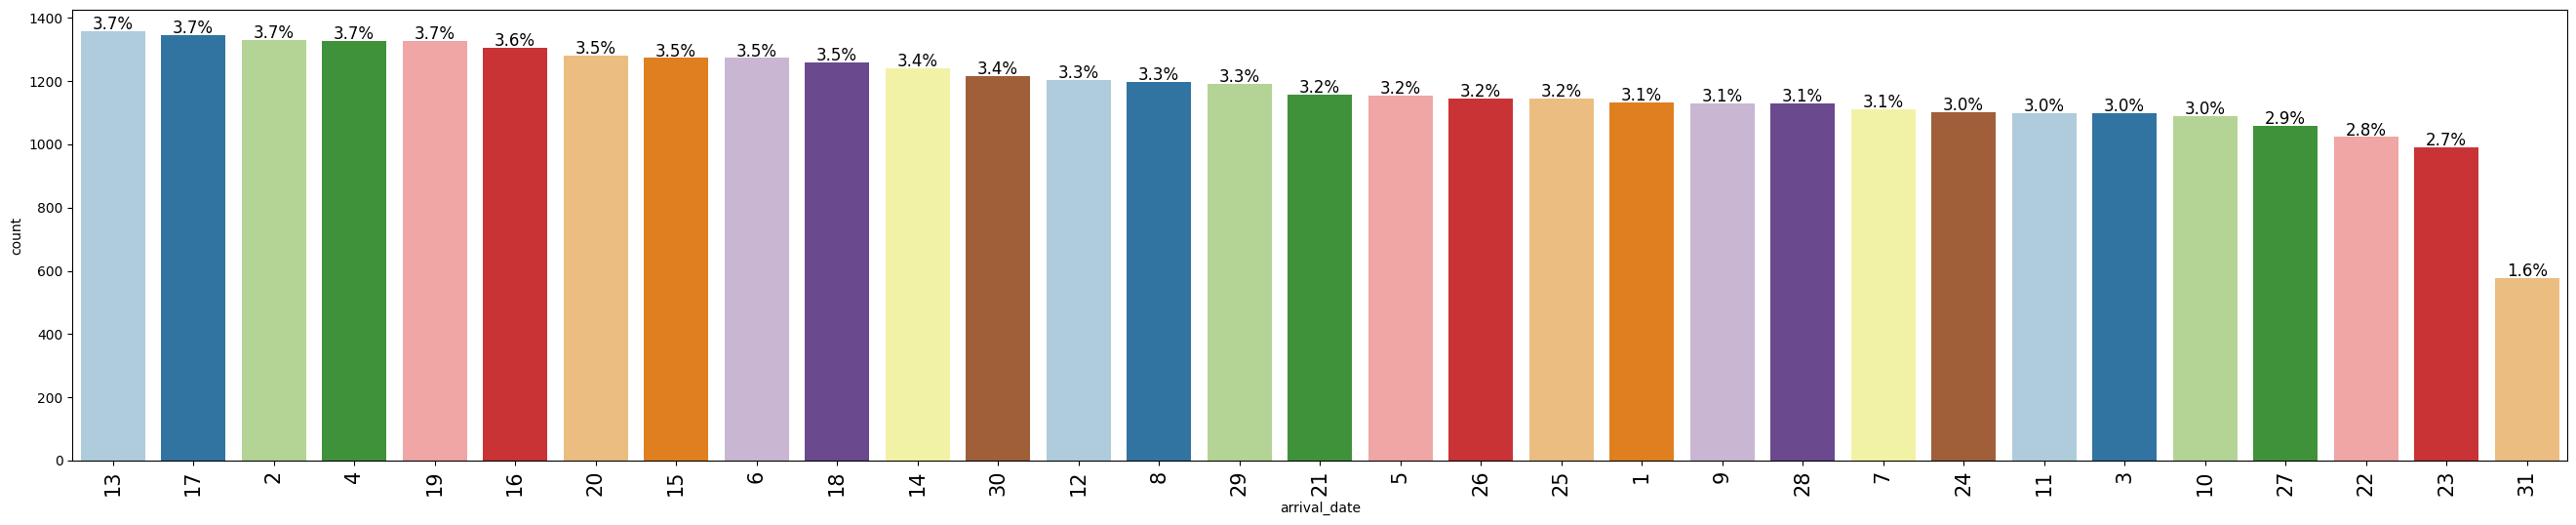

In [ ]:
labeled_barplot(data, "arrival_date", perc=True)

* The arrival counts are relatively evenly distributed across most dates, with no extreme peaks or troughs.
* Dates like the 13th, 17th, 2nd, 4th, and 19th each have the highest count of arrivals at around 3.7%, indicating that there isn't a significant preference for specific dates within a month.

* The 13th, 17th, 2nd, 4th, and 19th are the most common arrival dates, but their frequencies are only marginally higher than the other dates, suggesting these days may have minor factors influencing increased activity.

* The 31st has the lowest count, with only 1.6% of arrivals, likely because not every month has a 31st day. This irregularity can cause a lower arrival frequency for this date.

* The last few days of the month (27th to 31st) and the first few days of the month (1st to 5th) tend to have slightly lower arrival rates, ranging from 2.7% to 3.2%, which could be associated with end-of-month or start-of-month cycles, like payroll schedules or billing periods.

* The overall variation between the highest and lowest counts is minimal, indicating a fairly balanced arrival pattern throughout the month with no significant clustering on specific dates.

### Observation on repeated_guest

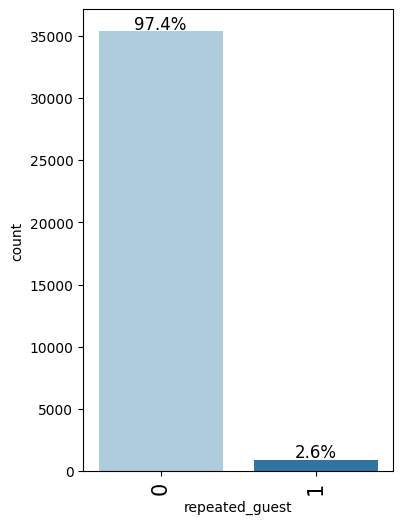

In [ ]:
labeled_barplot(data, "repeated_guest", perc=True)

* Approximately, 97.4% of the guests are not repeated.

* And only 2.6% of the guests are repeated, Which is significantly low in terms of business context. Strategies and planning are required to tackle this issue.

### Observation on no_of_previous_cancellations

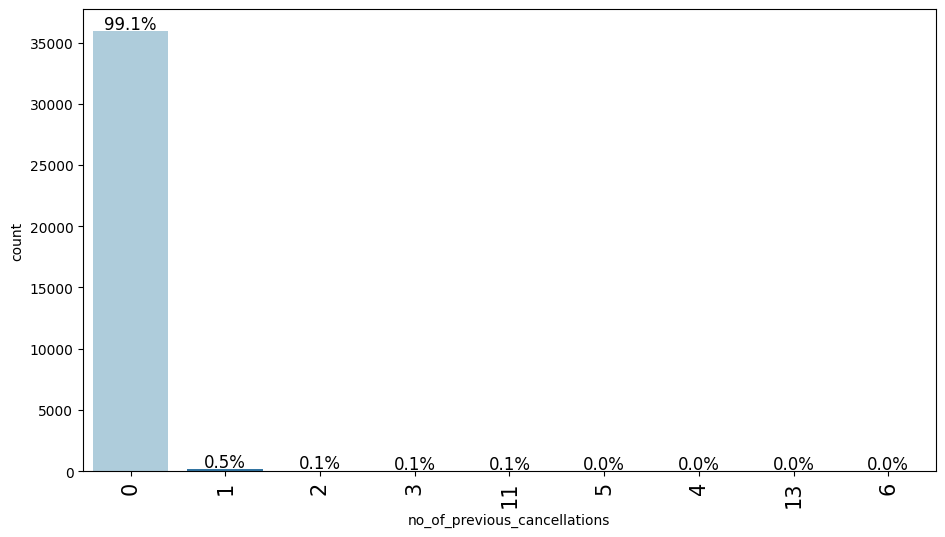

In [ ]:
labeled_barplot(data, "no_of_previous_cancellations", perc=True)

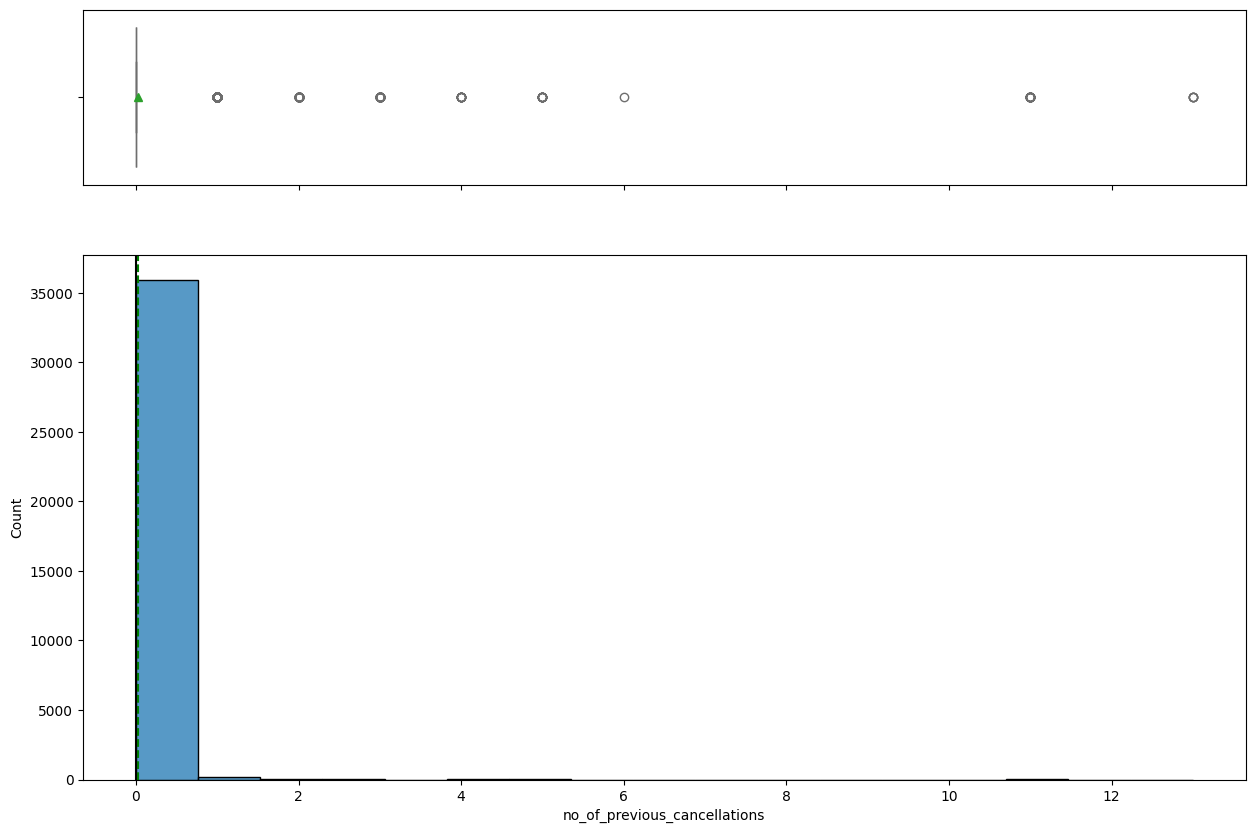

In [ ]:
histogram_boxplot(data, "no_of_previous_cancellations")

* A majority of customers (99.1%) have no history of previous cancellations, indicating strong booking commitment among most customers. This suggests that the majority of bookings proceed as planned without cancellations, reflecting positively on the customer base's reliability.

* Customers with multiple cancellations (1 or more) constitute an extremely small percentage of the overall bookings.


### Observation on no_of_previous_bookings_not_canceled

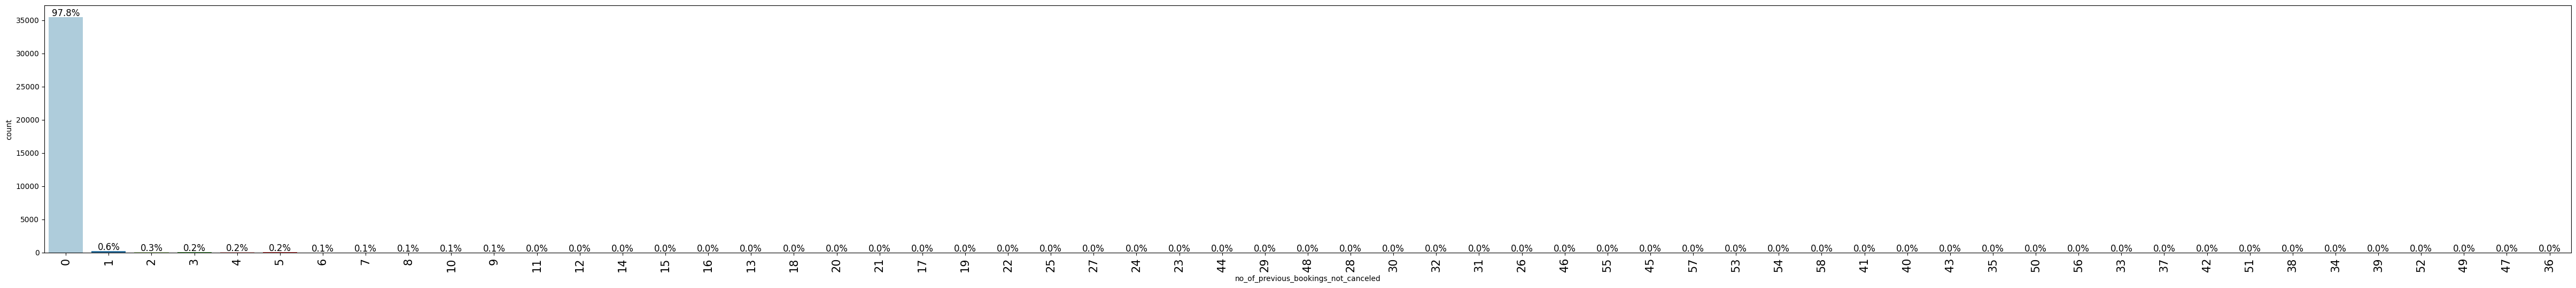

In [ ]:
labeled_barplot(data, "no_of_previous_bookings_not_canceled", perc=True)

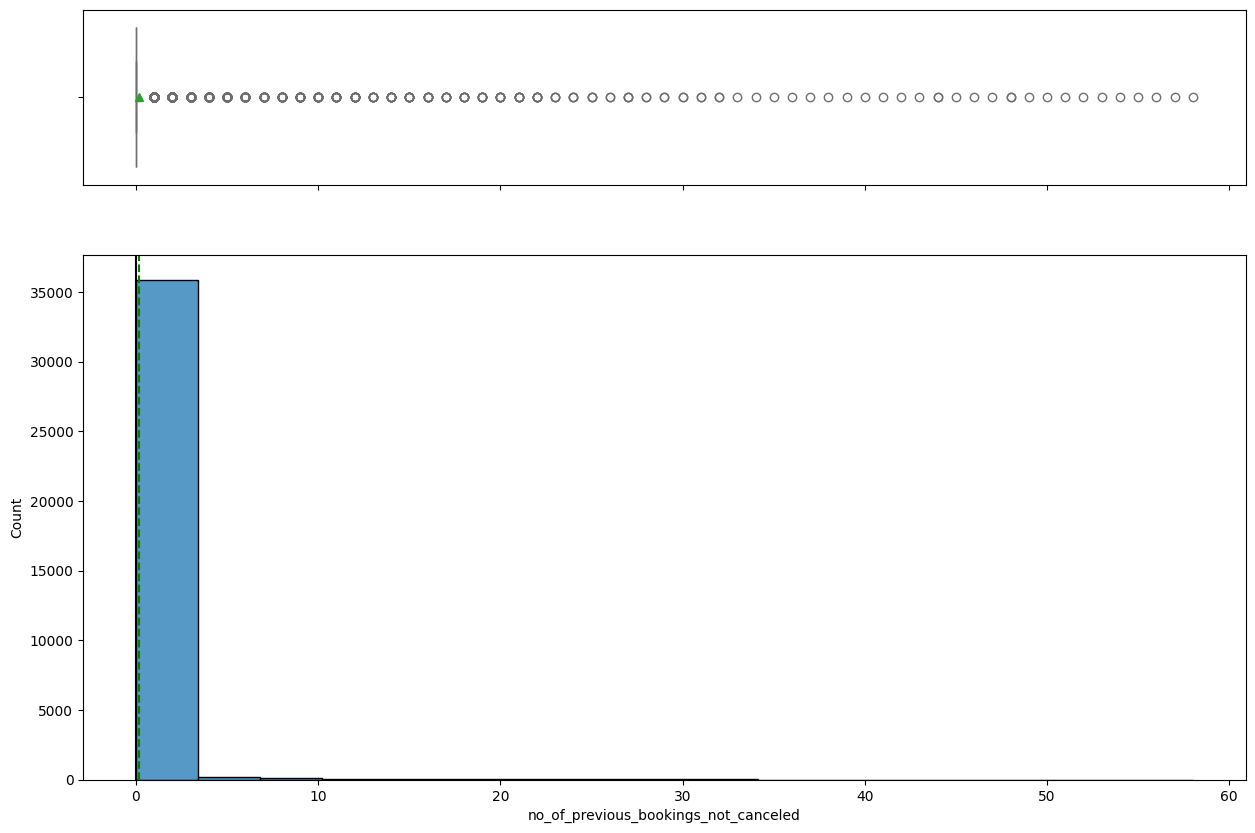

In [ ]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

* The overwhelming majority (97.8%) of customers have no previous bookings that were not canceled. This suggests that most bookings are from new or first-time customers.

* A very small percentage (2.2%) of customers have previous bookings that were not canceled, with the proportions decreasing as the number of such bookings increases. Only 0.6% of customers have one previous non-canceled booking, and the percentages continue to diminish further beyond this point.

* The data indicates extremely low levels of engagement in terms of repeat non-cancelled bookings, with the percentages dropping to 0.0% for customers having more than five previous non-cancelled bookings.




### Observation on no_of_special_requests

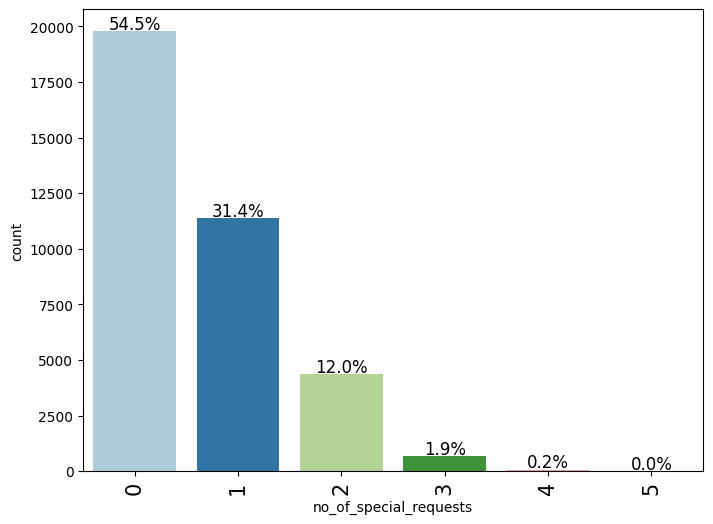

In [ ]:
labeled_barplot(data, "no_of_special_requests", perc=True)

* The majority of customers (54.5%) did not make any special requests during their booking, highlighting that while most customers do not require special request.
* A significant portion (31.4%) of customers made exactly one special request.
* The number of customers decreases sharply as the number of special requests increases. Only 12.0% of customers made two requests, 1.9% made three, and negligible proportions made four (0.2%) or five (0.0%) special requests.

### Observation on type_of_meal_plan

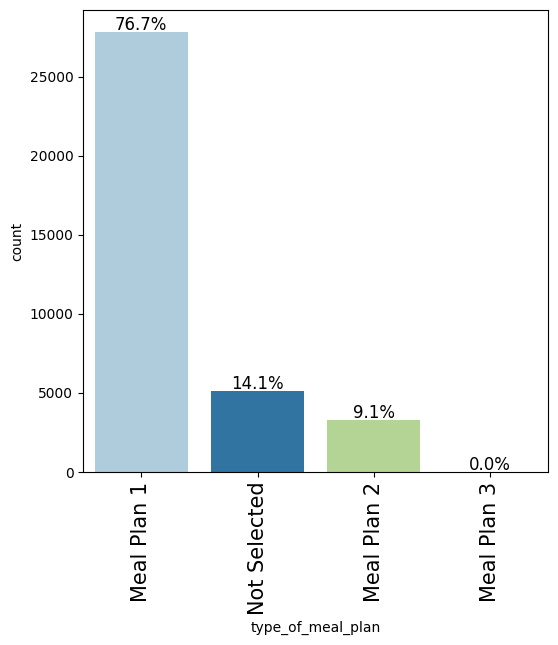

In [ ]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

* 76.7% of the guest preferred Meal Plan 1, making it by far the most preferrable meal type.
* The second most preferred Meal is Meal Plan 2 with 9.1%.
* 14.1% of the guests not selected any type of meal.
* Meal Plan 3 is effectively non-existent with 0.0% guests.

### Observation on room_type_reserved

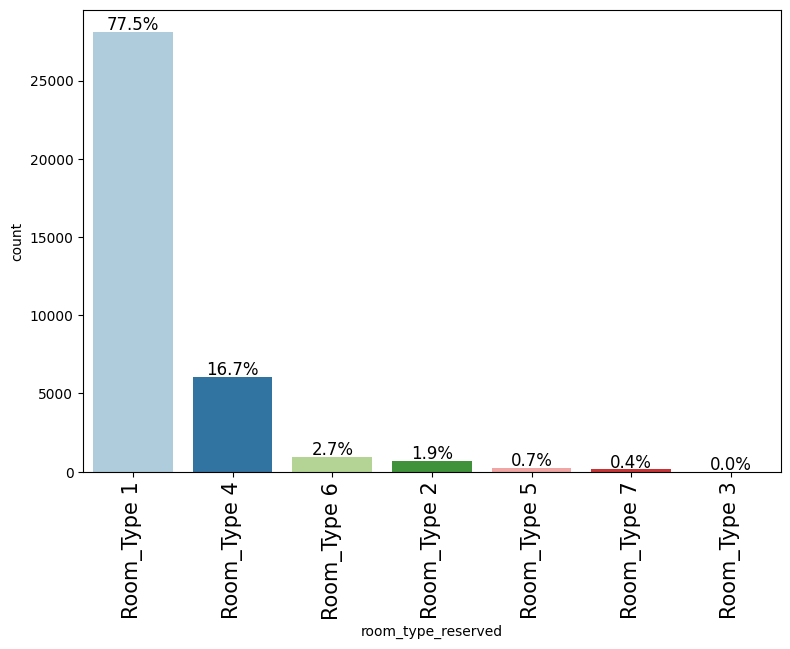

In [ ]:
labeled_barplot(data, "room_type_reserved", perc=True)

* 77.5% of the bookings are for Room Type 1, making it by far the most popular room type.

* 16.7% of bookings are for Room Type 4, which is the second most popular option.

* Room Type 6 and Room Type 2 follow with 2.7% and 1.9% of bookings, respectively. These room types are chosen by a much smaller segment of customers.
* Room Type 5 and Room Type 7 have even lower percentages, with 0.7% and 0.4% of the total bookings, respectively.
* Room Type 3 is effectively non-existent with 0.0% bookings.

### Observation on market_segment_type

**Which market segment do most of the guests come from?**

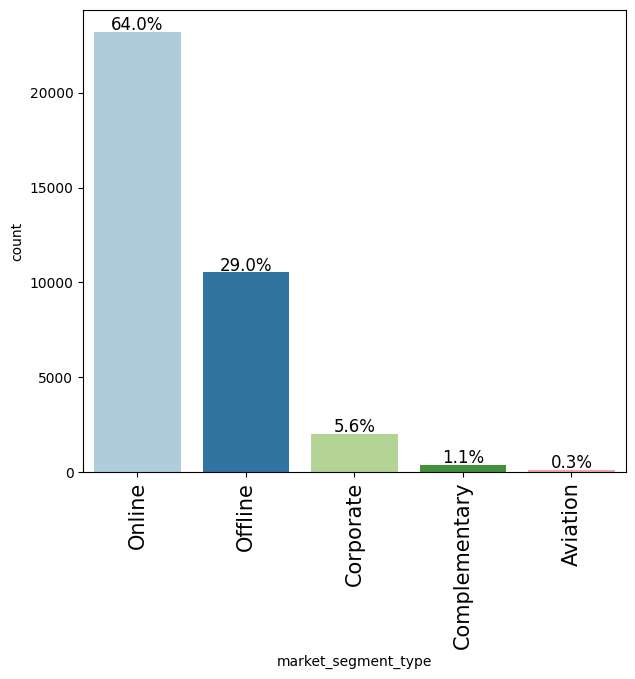

In [ ]:
labeled_barplot(data, "market_segment_type", perc=True)

* **64.0% of the bookings come from the Online market segment, making it the largest contributor** by a significant margin. The Hotel should give more focus on online booking as it will help the business to increase booking.

> Add blockquote



* The Offline segment accounts for 29.0% of bookings, indicating that a substantial portion of customers still prefer or rely on traditional booking methods.

* Other market segment like Corporate, Complementary, Aviation contribute 5.6%, 1.1%, 0.3% which is very small in numbers compared to online & offline chanels.

### Observation on booking_status

**What percentage of bookings are canceled?**

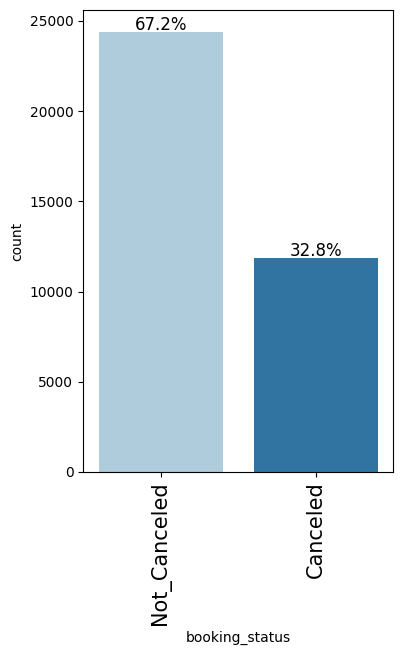

In [ ]:
labeled_barplot(data, "booking_status", perc=True)

* Approximately, 67.2% of the bookings were not canceled, implying that the majority of bookings proceed as planned.

* Conversely, **32.8% of the bookings were canceled.** This indicates that nearly one-third of all bookings result in cancellations.

## Bivariate Analysis

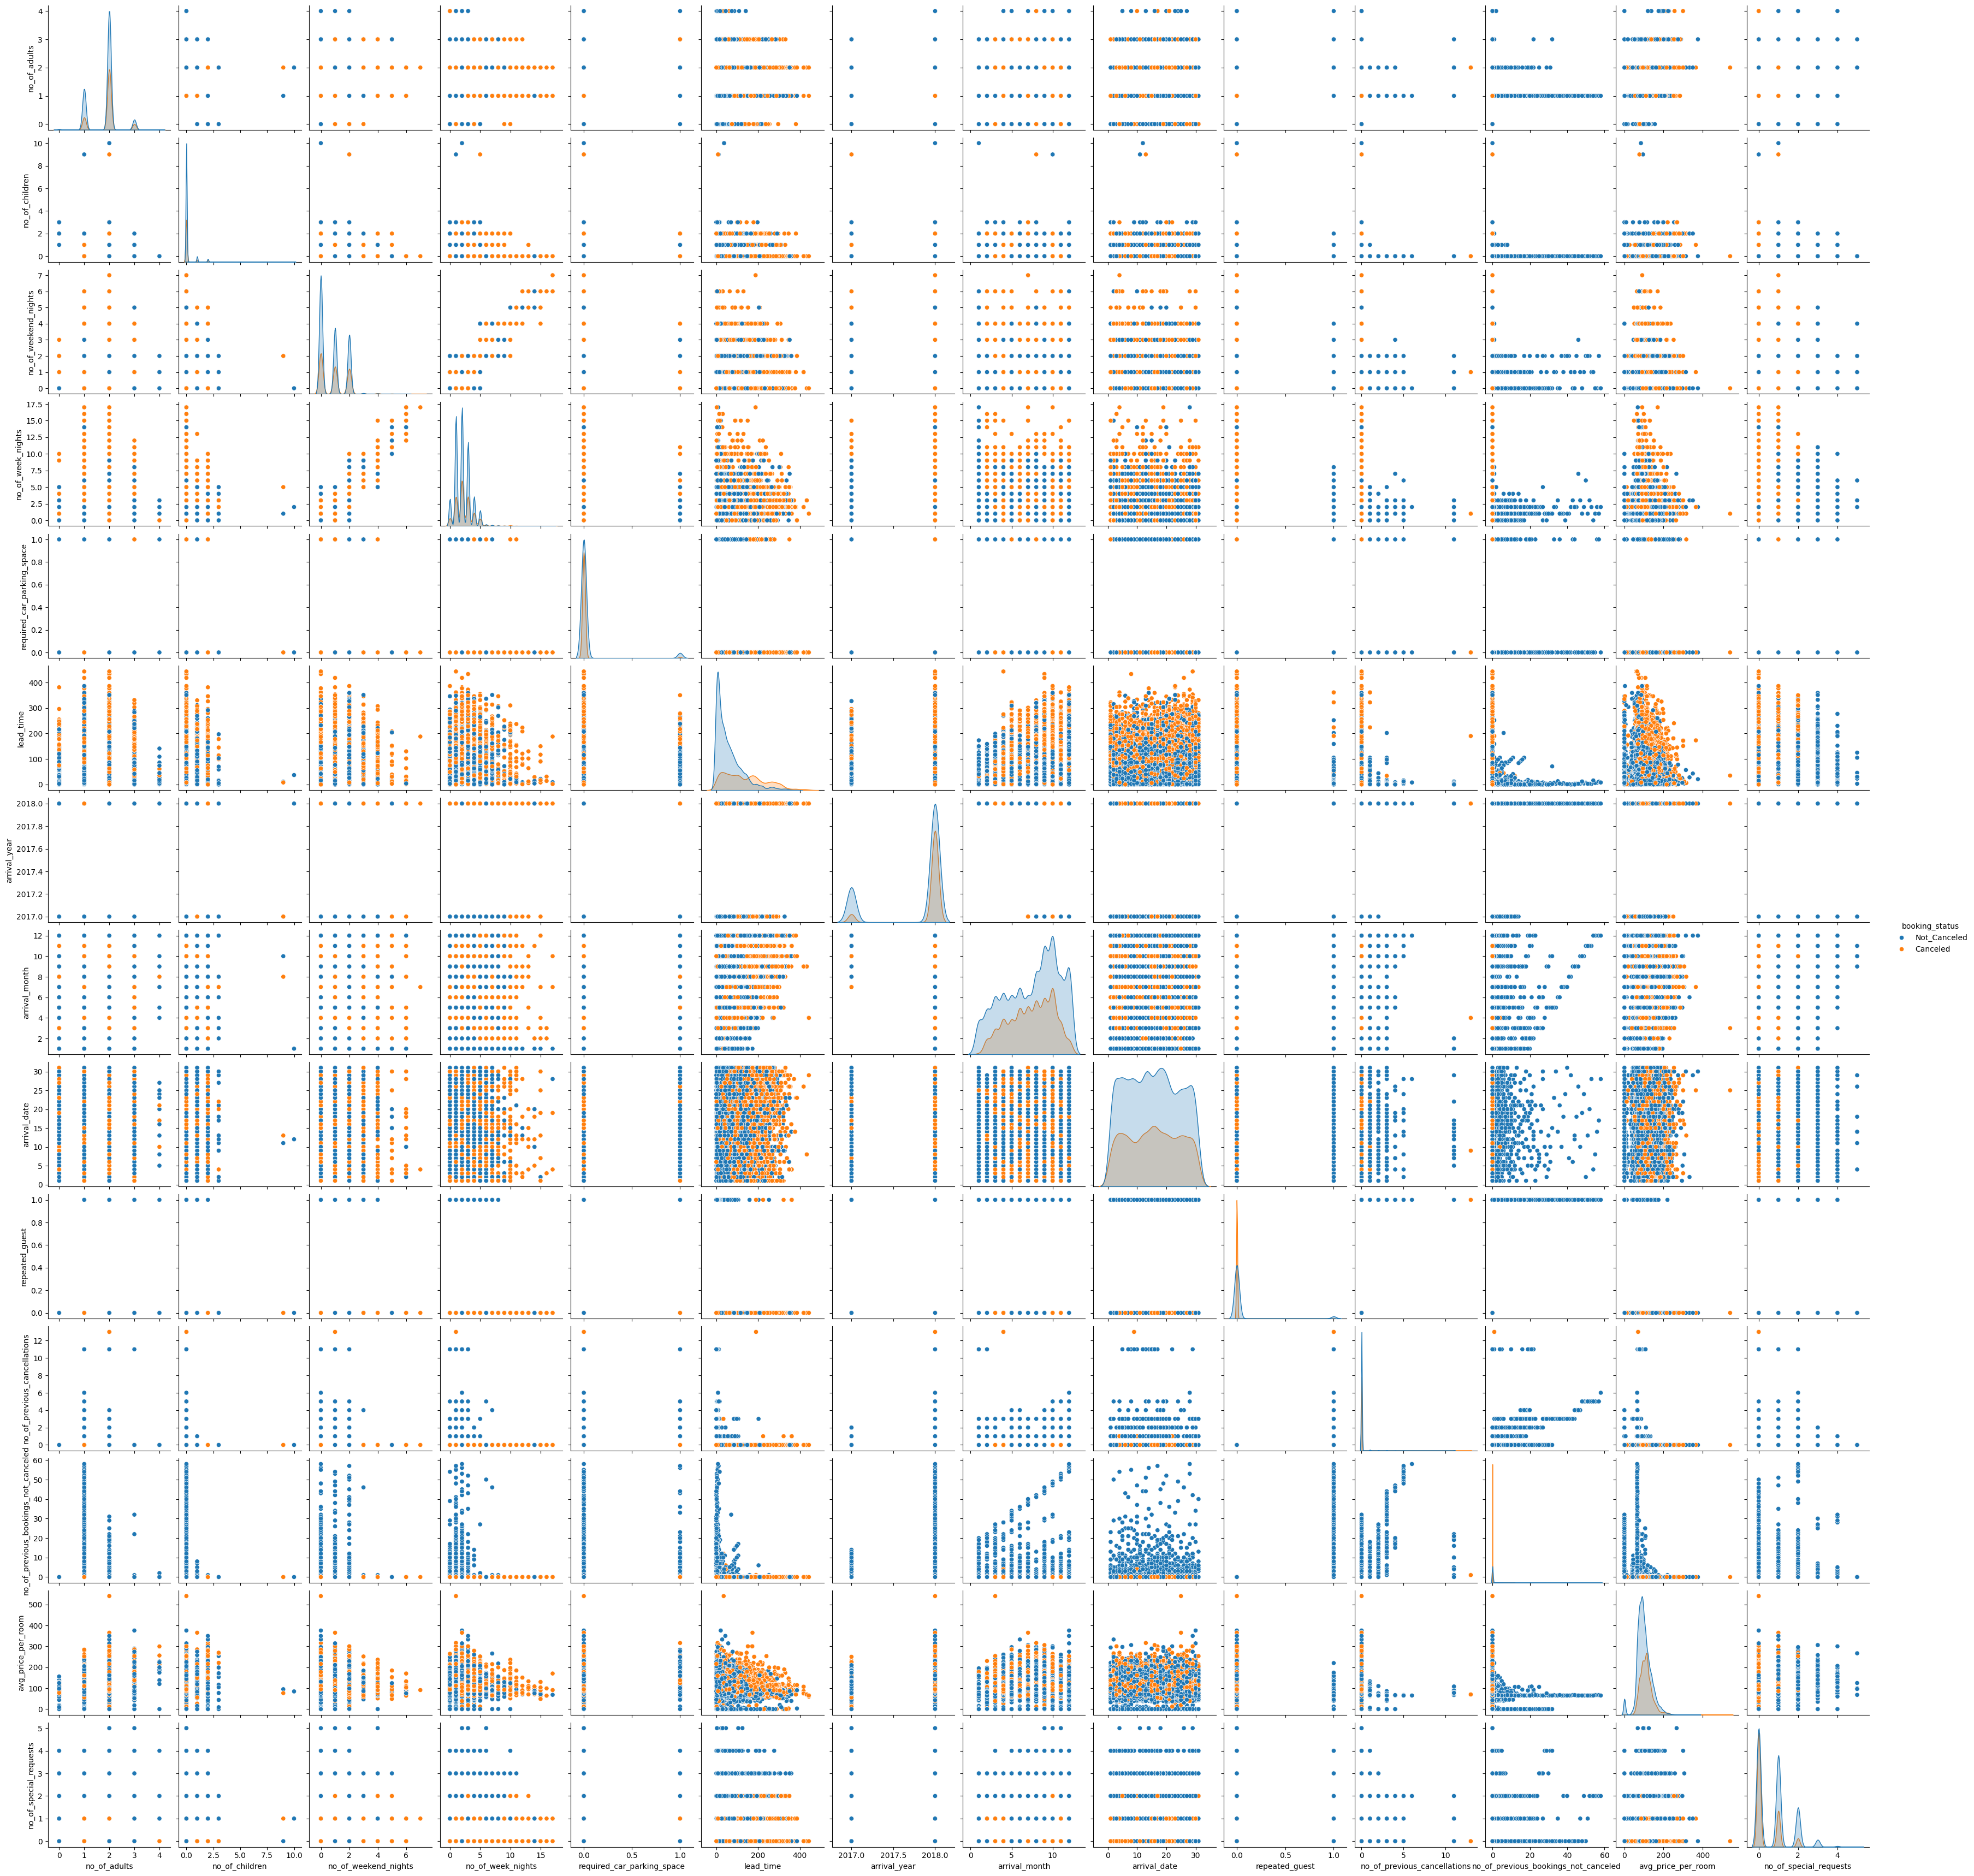

In [ ]:
# Select relevant features for pair plot
#features = ['avg_price_per_room', 'lead_time', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'booking_status']
#data_pairplot = data[features]

# Create pair plot with hue = booking_status
#sns.pairplot(data, hue='booking_status', diag_kind='kde')
#plt.show()


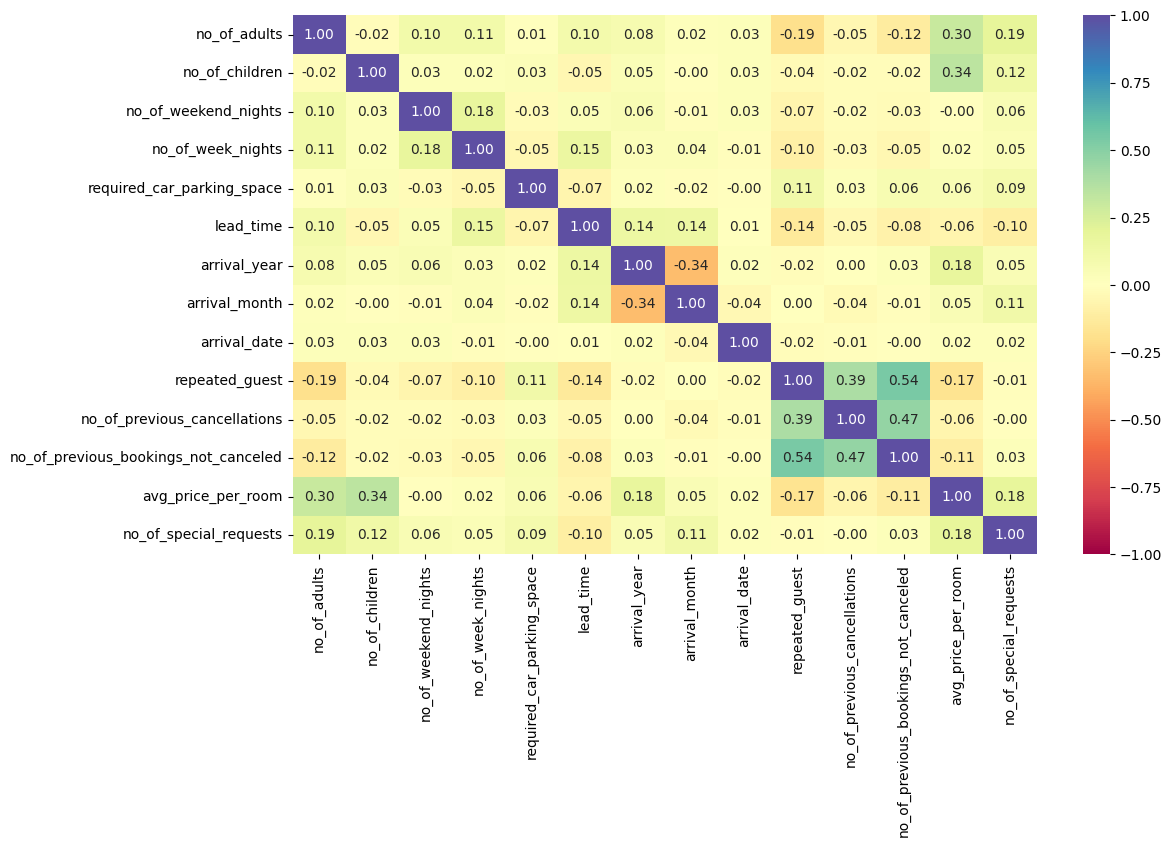

In [ ]:
# Plotting heatmap
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* no_of_previous_cancellations and no_of_previous_bookings_not_canceled (0.54): This indicates that customers with a history of cancellations also have a record of non-canceled bookings, suggesting variability in booking behavior among these individuals.
* avg_price_per_room with no_of_adults (0.30), no_of_children (0.34), and no_of_weekend_nights (0.20): Higher room prices tend to be associated with bookings involving more adults, children, and extended weekend stays, which may reflect larger group bookings or premium accommodation choices.


* no_of_special_requests and repeated_guest (0.11): Repeated guests are slightly more likely to make special requests, potentially due to familiarity with the service or specific needs.

* lead_time and arrival_year (0.14): A slight increase in lead time with more recent years might indicate changing booking patterns, such as planning further in advance.

* no_of_special_requests and no_of_previous_bookings_not_canceled (0.18): Guests with a history of non-canceled bookings are somewhat more likely to have special requests.



* arrival_year and arrival_month (-0.34): Indicates that arrivals in later years are associated with different seasonal patterns or distribution compared to earlier years.

* repeated_guest and no_of_adults (-0.19): Repeat guests tend to book for smaller groups, possibly indicating a preference for individual or couple travel rather than family or group bookings.

* lead_time and repeated_guest (-0.14): Repeat guests generally book with shorter lead times, likely due to increased familiarity and confidence in the booking process.



* Most other variable pairs show very low or near-zero correlations, suggesting little to no direct relationship. These include relationships between variables such as arrival_date, required_car_parking_space, and various other features, indicating independent booking behaviors that are not strongly influenced by these factors.


**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**


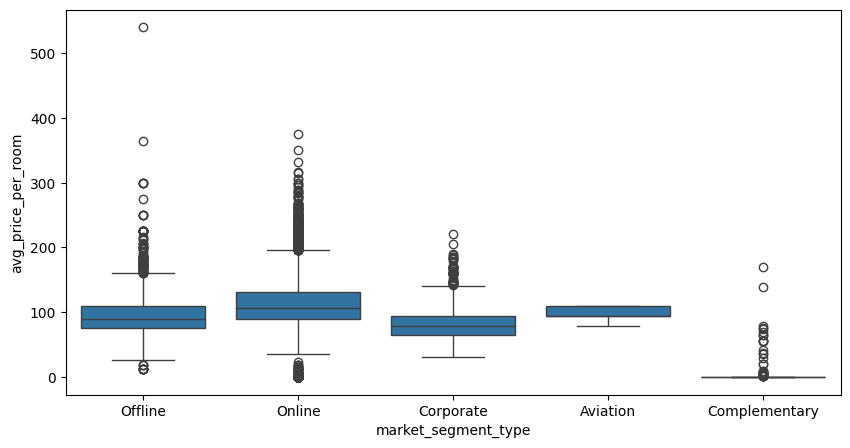

In [ ]:
# Plotting boxplot between market_segment_type vs avg_price_per_room
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(x="market_segment_type", y="avg_price_per_room", data=data)
plt.show()

In [ ]:
data.groupby(["market_segment_type"])["avg_price_per_room"].describe()

count      mean      std      min      25%  \
market_segment_type                                                    
Aviation              125.00000 100.70400  8.53836 79.00000 95.00000   
Complementary         391.00000   3.14176 15.51297  0.00000  0.00000   
Corporate            2017.00000  82.91174 23.69000 31.00000 65.00000   
Offline             10528.00000  91.63268 24.99560 12.00000 75.00000   
Online              23214.00000 112.25685 35.22032  0.00000 89.00000   

                          50%       75%       max  
market_segment_type                                
Aviation             95.00000 110.00000 110.00000  
Complementary         0.00000   0.00000 170.00000  
Corporate            79.00000  95.00000 220.00000  
Offline              90.00000 109.00000 540.00000  
Online              107.10000 131.75000 375.50000

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**


In [ ]:
data.groupby(['repeated_guest'])['booking_status'].value_counts(normalize=True)*100

repeated_guest  booking_status
0               Not_Canceled     66.41958
                Canceled         33.58042
1               Not_Canceled     98.27957
                Canceled          1.72043
Name: proportion, dtype: float64

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


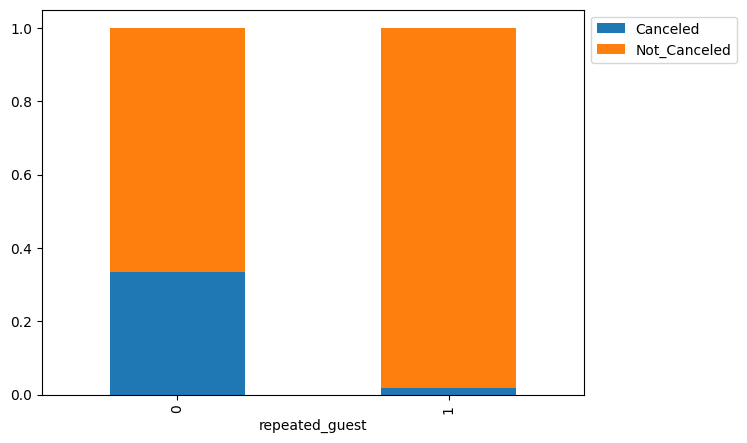

In [ ]:
stacked_barplot(data, "repeated_guest", "booking_status")

**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


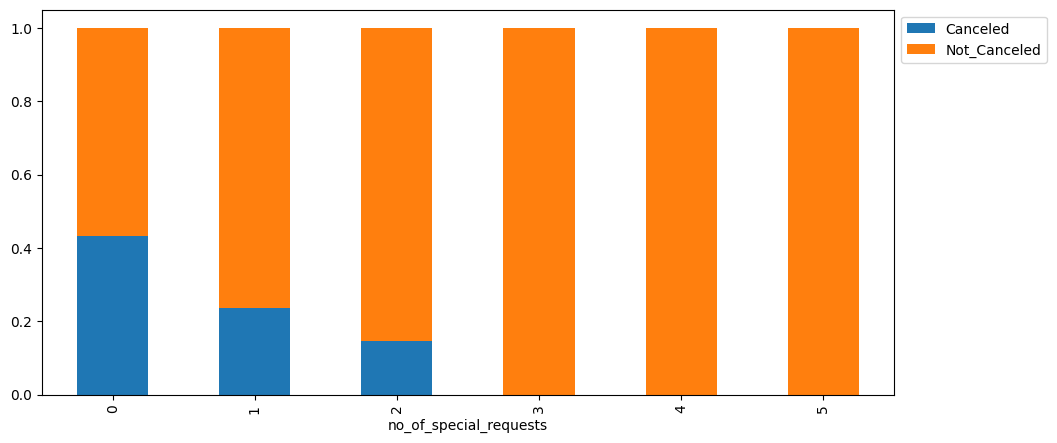

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

* As the number of special requests increases from 0 to 5, the proportion of cancellations (blue bars) consistently decreases. This suggests that guests with more special requests are less likely to cancel their bookings.
* The highest cancellation rate is observed when there are no special requests (@50%). This indicates that guests without specific needs are more prone to cancel their bookings.

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


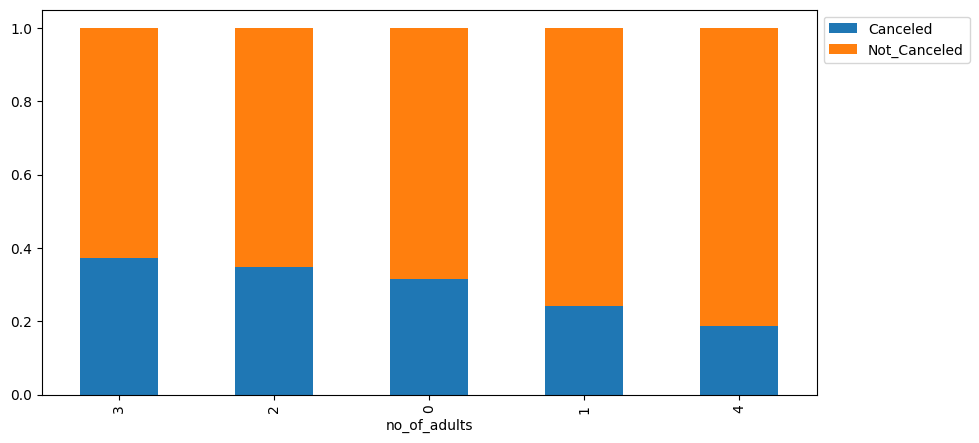

In [ ]:
stacked_barplot(data, "no_of_adults", "booking_status")

* Bookings with 2 adults have the highest cancellation.

In [ ]:
data.groupby(['no_of_children'])['booking_status'].value_counts(normalize=True)*100

no_of_children  booking_status
0               Not_Canceled      67.59091
                Canceled          32.40909
1               Not_Canceled      66.62546
                Canceled          33.37454
2               Not_Canceled      56.80529
                Canceled          43.19471
3               Not_Canceled      73.68421
                Canceled          26.31579
9               Canceled          50.00000
                Not_Canceled      50.00000
10              Not_Canceled     100.00000
Name: proportion, dtype: float64

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


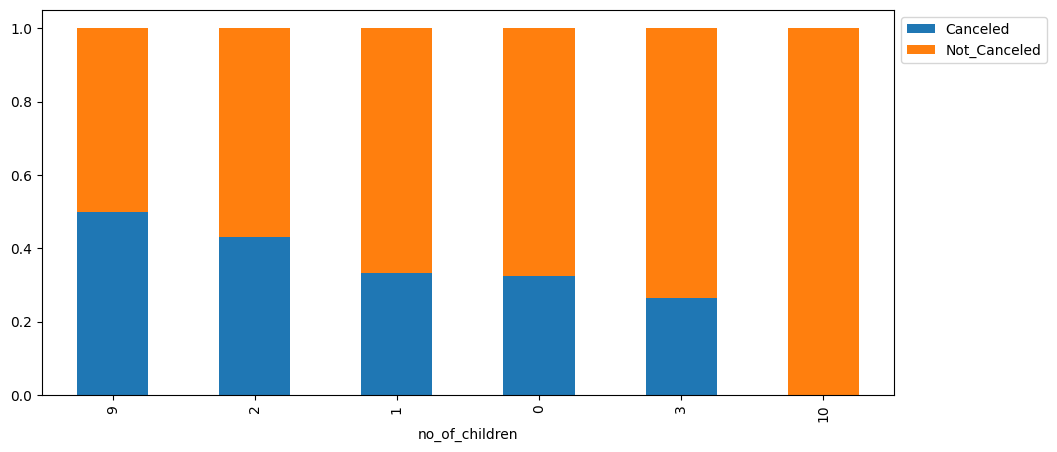

In [ ]:
stacked_barplot(data, "no_of_children", "booking_status")

* Guests with no children cancel more bookings then guests booking with children.

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


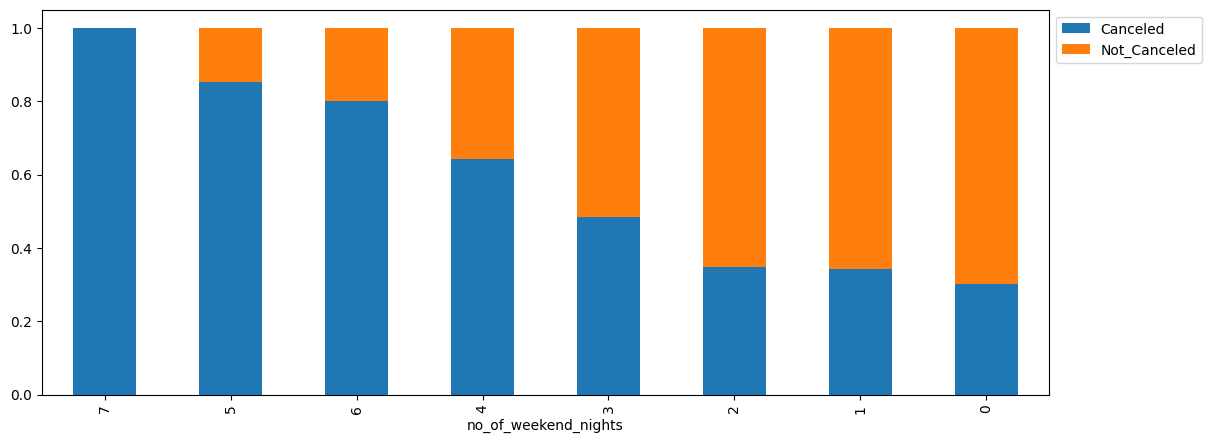

In [ ]:
stacked_barplot(data, "no_of_weekend_nights", "booking_status")

* it can be clearly observed that no. of weekend nights inceases, no. of booking increases and no. of cancellation also increases.

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

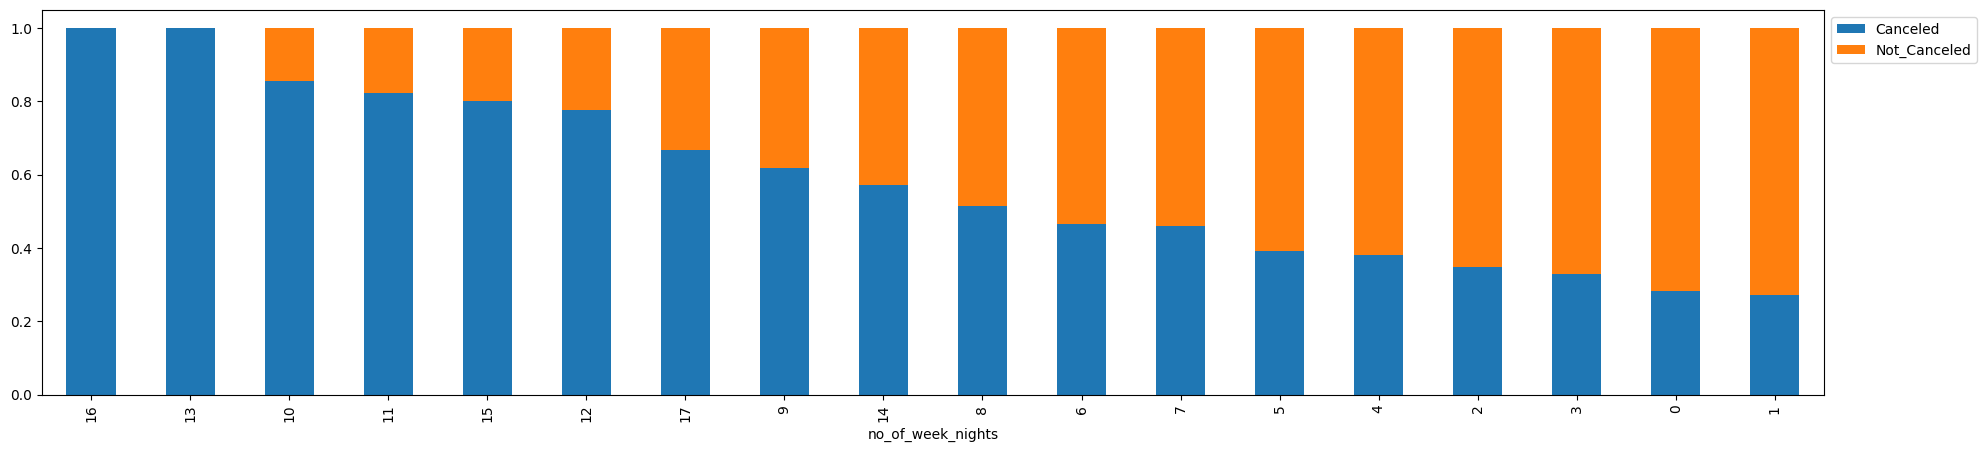

In [ ]:
stacked_barplot(data, "no_of_week_nights", "booking_status")

* More no. of cancellations were done by the guests who book for 2 week nights.

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


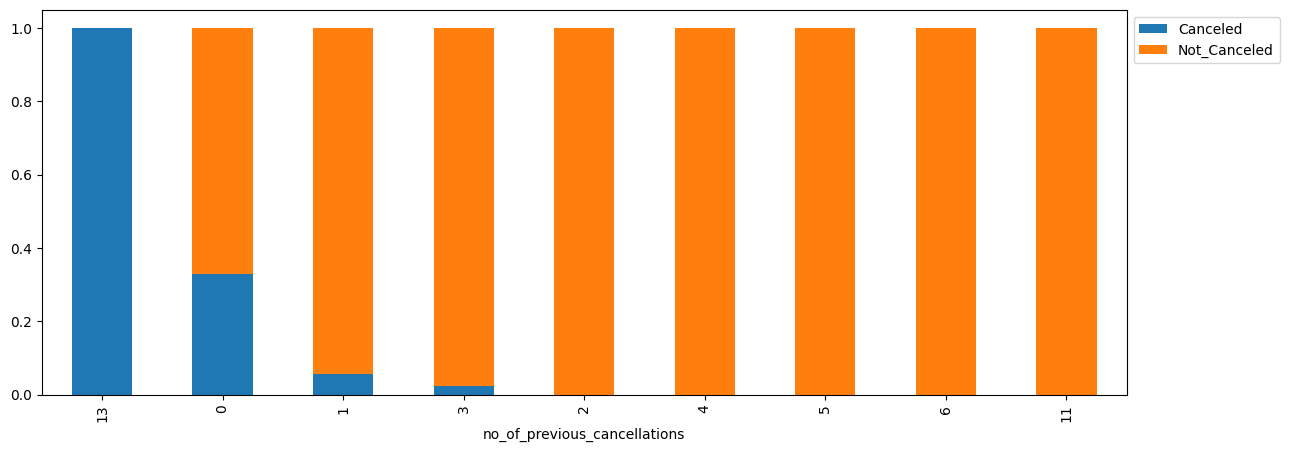

In [ ]:
stacked_barplot(data, "no_of_previous_cancellations", "booking_status")

* No. of previous cancellations more than 11 tend to cancel the booking. This implies that customer with more no. of booking likely to cancel the booking.

booking_status                        Canceled  Not_Canceled    All
no_of_previous_bookings_not_canceled                               
All                                      11885         24390  36275
0                                        11878         23585  35463
1                                            4           224    228
12                                           1            11     12
4                                            1            64     65
6                                            1            35     36
2                                            0           112    112
44                                           0             2      2
43                                           0             1      1
42                                           0             1      1
41                                           0             1      1
40                                           0             1      1
38                                           0  

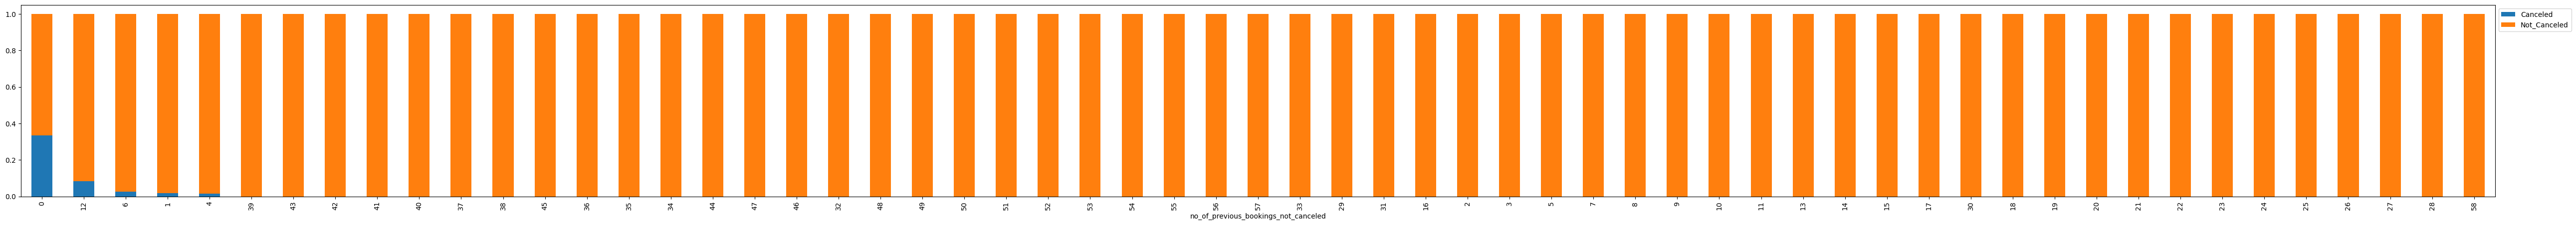

In [ ]:
stacked_barplot(data, "no_of_previous_bookings_not_canceled", "booking_status")

In [ ]:
data.groupby(['booking_status'])['market_segment_type'].value_counts(normalize=True)*100

booking_status  market_segment_type
Canceled        Online                71.30837
                Offline               26.52924
                Corporate              1.85107
                Aviation               0.31132
Not_Canceled    Online                60.43050
                Offline               30.23780
                Corporate              7.36777
                Complementary          1.60312
                Aviation               0.36080
Name: proportion, dtype: float64

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


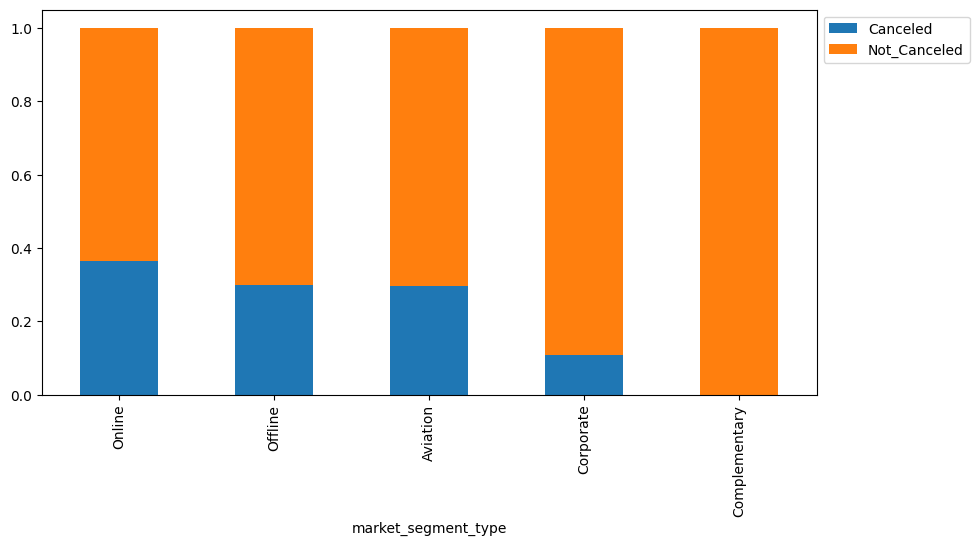

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

* Online cancellation of booking is most with 71.3% cancellations follwed by offline with 26.52% cancellation.

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


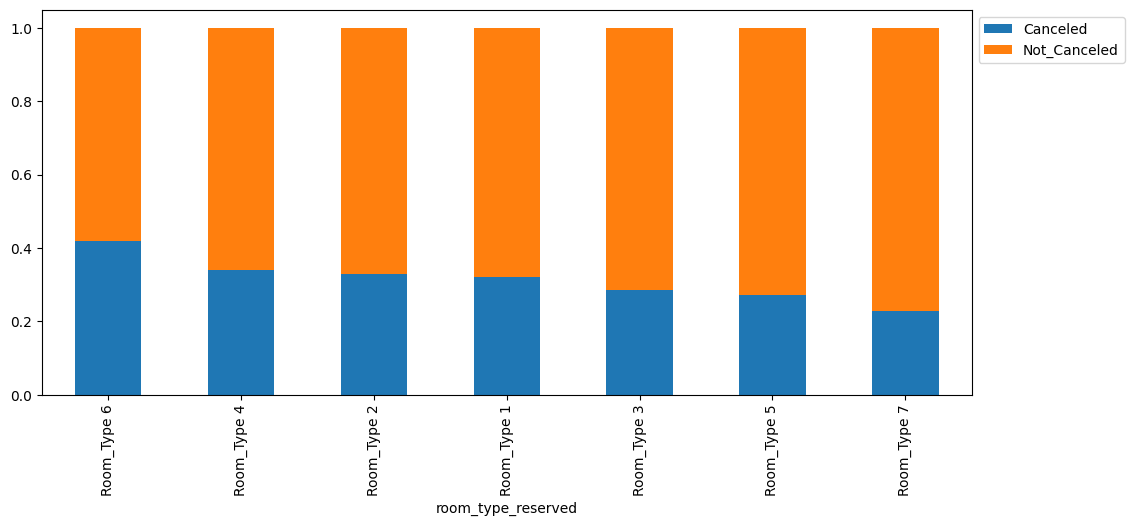

In [ ]:
stacked_barplot(data, "room_type_reserved", "booking_status")

* Customer with room type 1 preferrence has more no. of cancellation followed by room type 4.

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


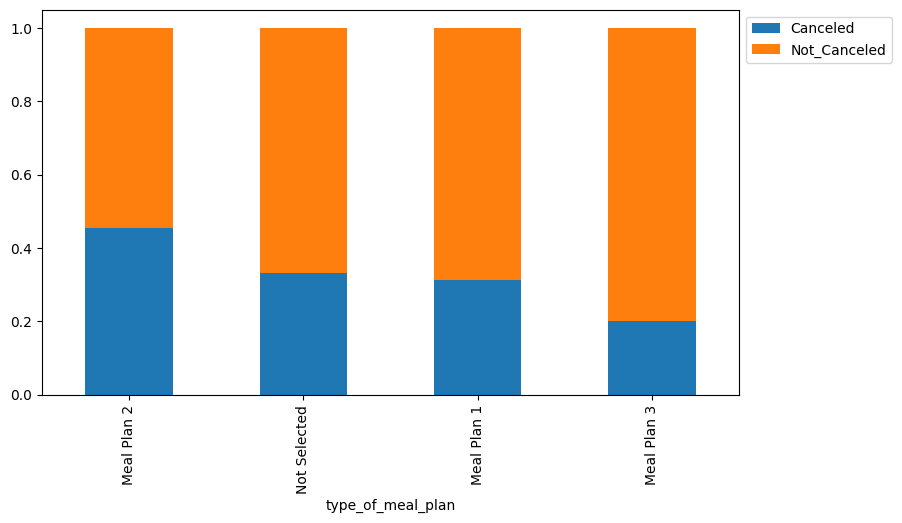

In [ ]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

* Customer who prefer Meal Plan 1 are more likely to cancel the booking.

In [ ]:
data.groupby(['required_car_parking_space'])['booking_status'].value_counts(normalize=True)*100

required_car_parking_space  booking_status
0                           Not_Canceled     66.51304
                            Canceled         33.48696
1                           Not_Canceled     89.85765
                            Canceled         10.14235
Name: proportion, dtype: float64

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


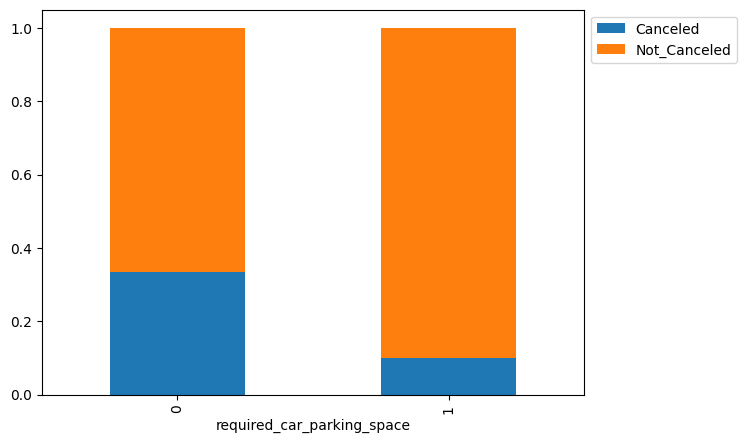

In [ ]:
stacked_barplot(data, "required_car_parking_space", "booking_status")

* 33.48% of Customer who does not require car parking canceled the booking & 66.51% Not Canceled.

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


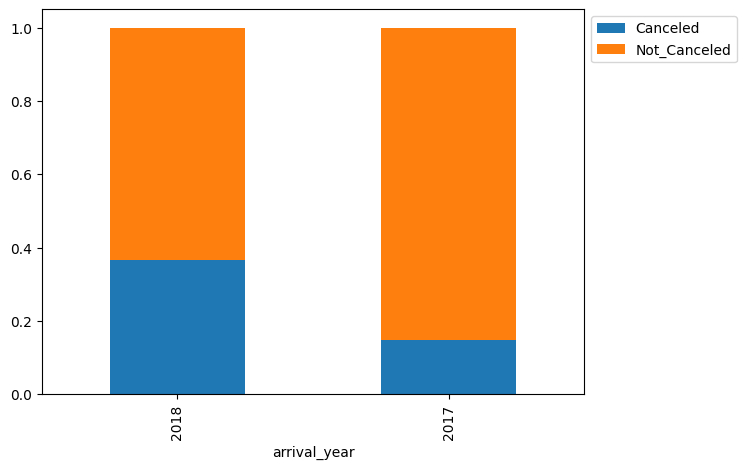

In [ ]:
stacked_barplot(data, "arrival_year", "booking_status")

* 2018 has more no. of cancellations compare to previous year.

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


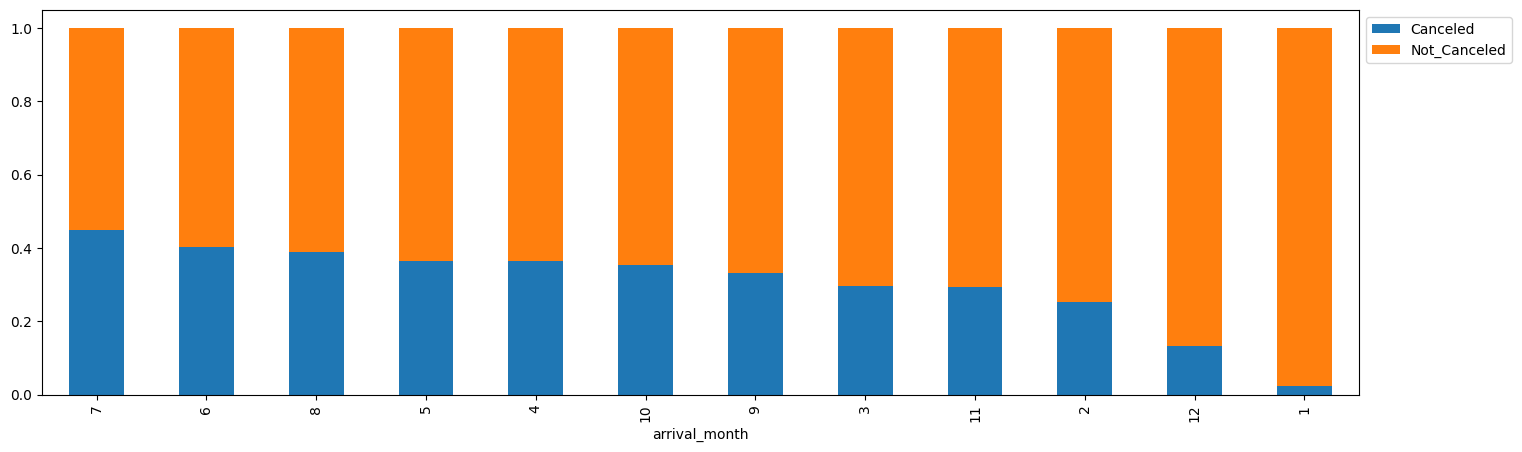

In [ ]:
stacked_barplot(data, "arrival_month", "booking_status")

* October has more no. Of cancellation with 1880 cancellation in one month.

booking_status  Canceled  Not_Canceled    All
arrival_date                                 
All                11885         24390  36275
15                   538           735   1273
4                    474           853   1327
16                   473           833   1306
30                   465           751   1216
1                    465           668   1133
12                   460           744   1204
17                   448           897   1345
6                    444           829   1273
26                   425           721   1146
19                   413           914   1327
20                   413           868   1281
13                   408           950   1358
28                   405           724   1129
3                    403           695   1098
25                   395           751   1146
21                   376           782   1158
24                   372           731   1103
18                   366           894   1260
7                    364          

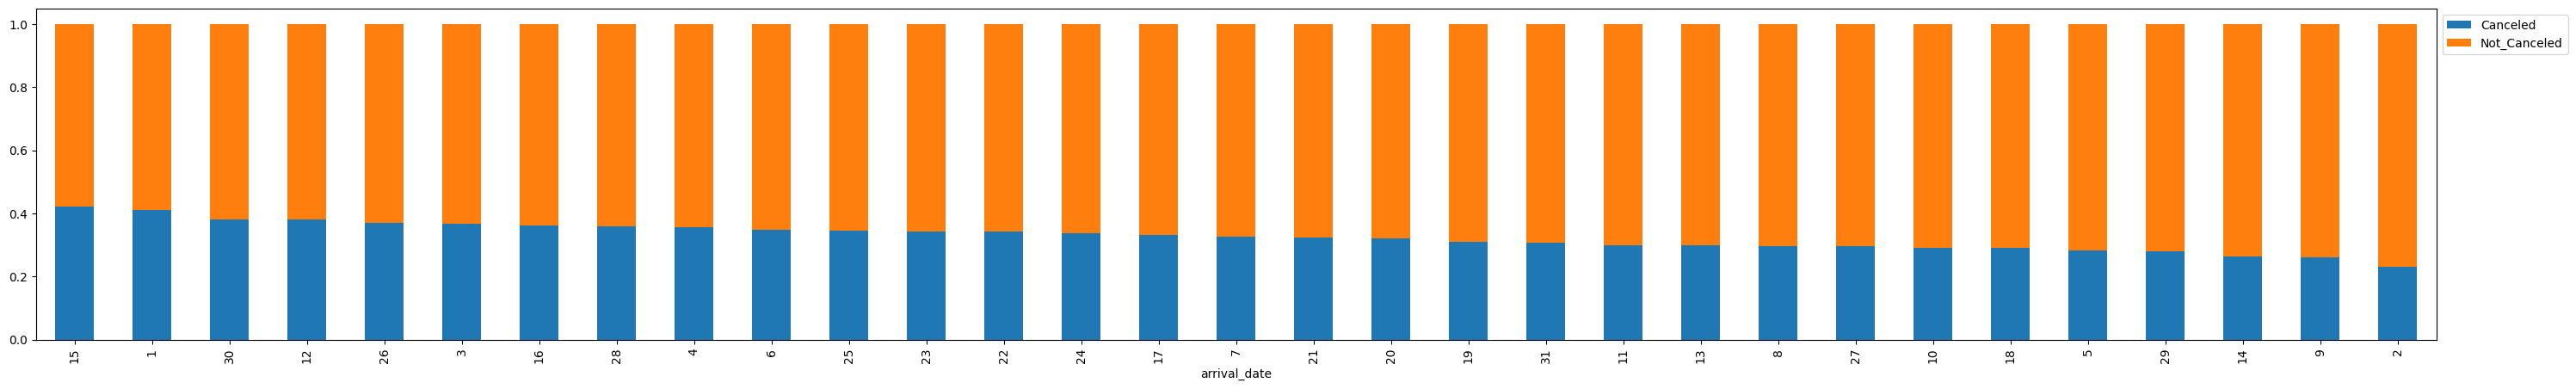

In [ ]:
stacked_barplot(data, "arrival_date", "booking_status")

In [ ]:
data.groupby(['booking_status'])['repeated_guest'].value_counts(normalize=True)*100

booking_status  repeated_guest
Canceled        0                99.86538
                1                 0.13462
Not_Canceled    0                96.25256
                1                 3.74744
Name: proportion, dtype: float64

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


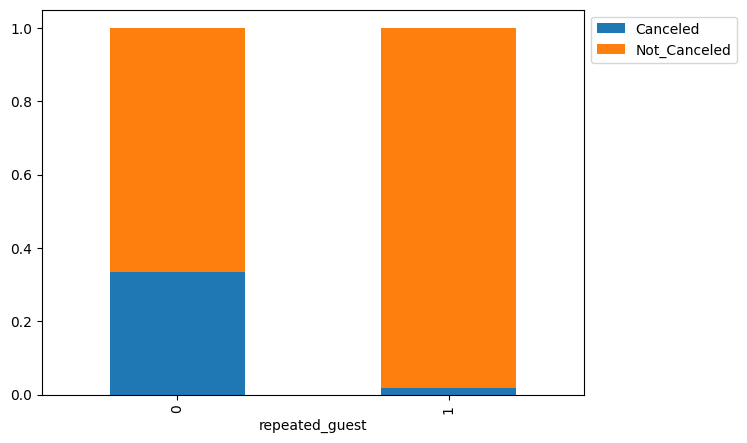

In [ ]:
stacked_barplot(data, "repeated_guest", "booking_status")

* Out of total no. of booking canceled 99.86% of booking canceled by new customer.

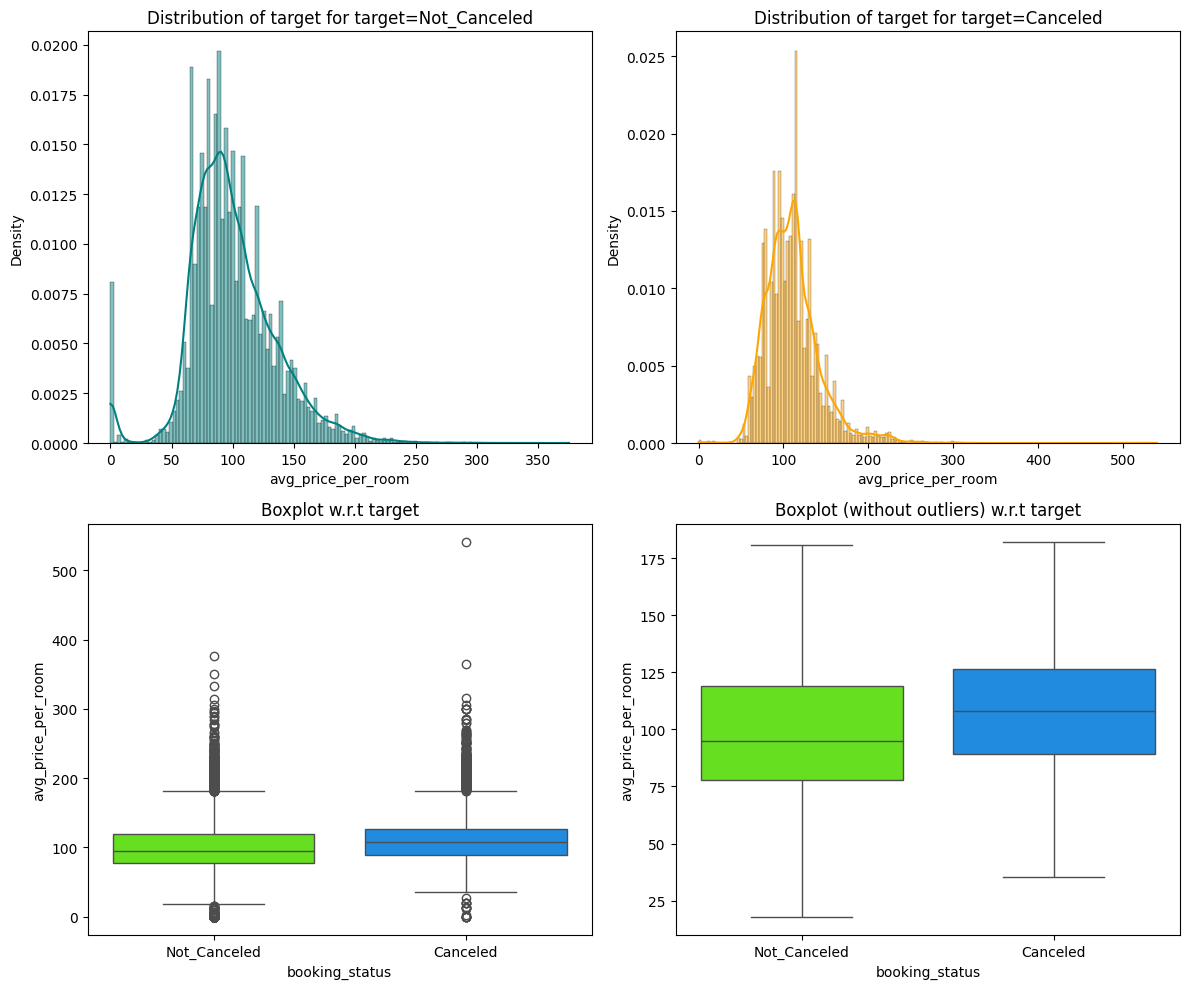

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

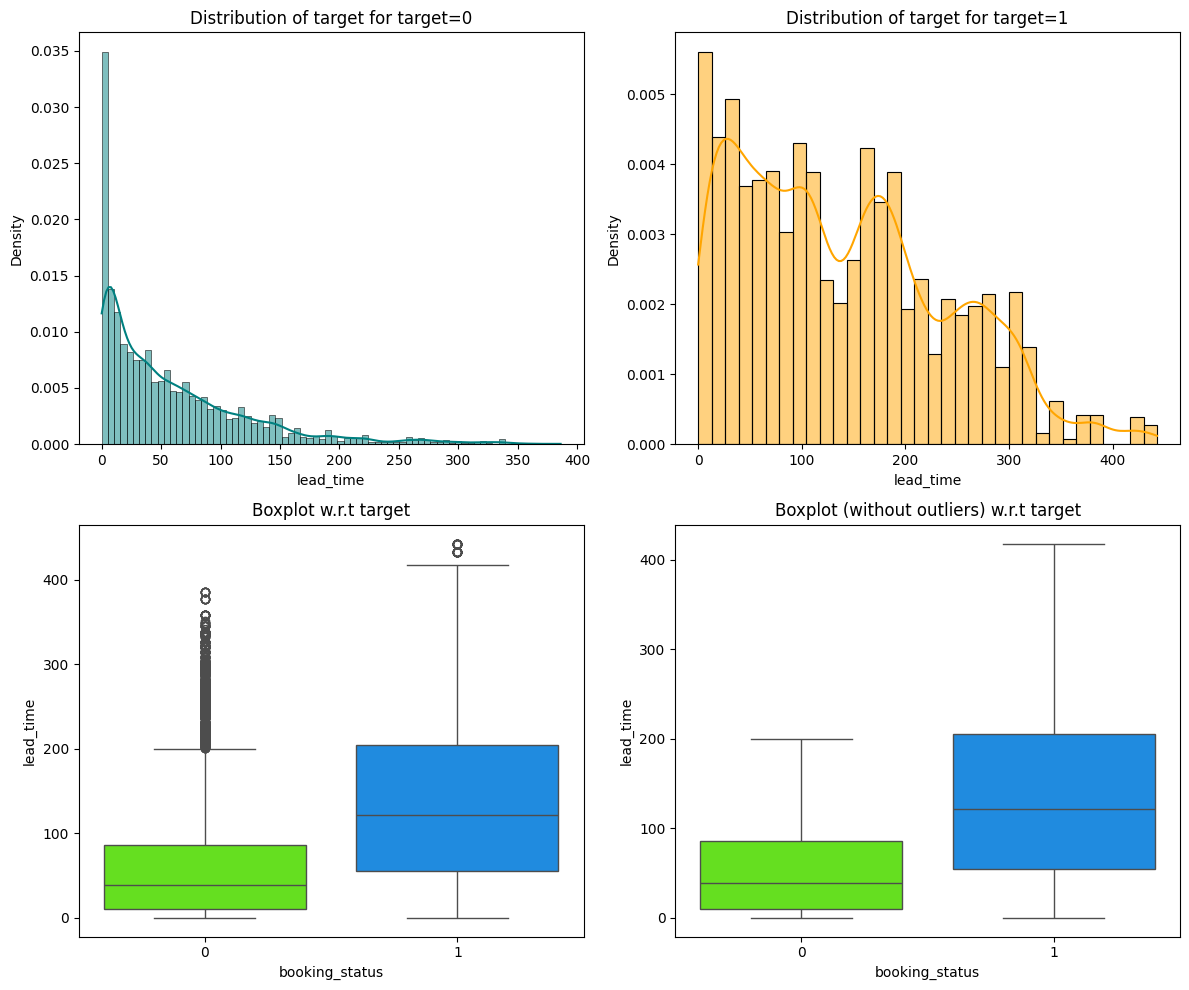

In [ ]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

# **Data Preprocessing**

## Outlier Check

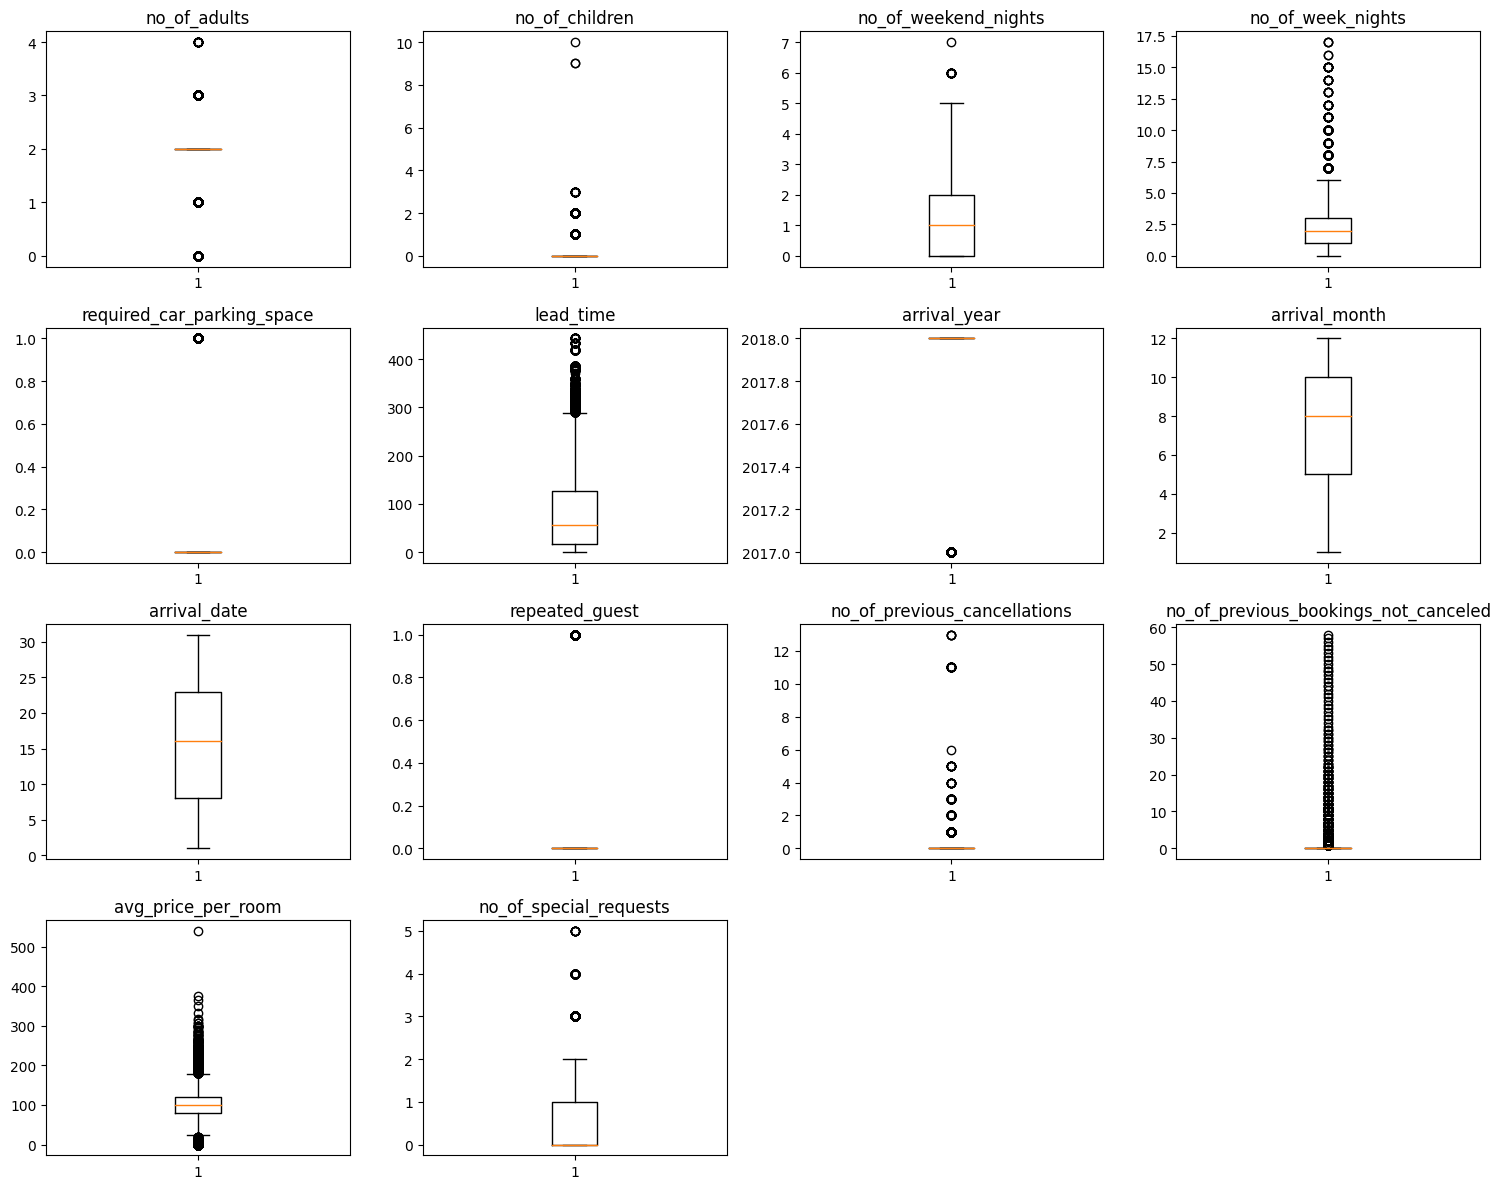

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
#numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* **avg_price-per_room:** The outliers might represent luxury or premium offerings and should not be removed.

* **lead_time:** These outliers represent that the some customers might booked long back from the arrival date and hence, cannot not be removed.

* Other Numerical Variable doesnot have continuous values and the ouliers are also normal. Therefore, no need to outlier treatment in this case.

## Data Preparation for modeling

We are predicting which booking is likely to be canceled. so, Booking_Status” column converted from categorical to numerical (int) for building models with Not_Canceled as 0 & Canceled as 1.

In [ ]:
# Convert 'booking_status' column from object to int64

data['booking_status'] = data['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
data['booking_status'] = data['booking_status'].astype('int64')


In [ ]:
# define the dependent and independent variables
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# creating dummies
X = pd.get_dummies(X, drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y)

In [ ]:
## Reset the index of y_train so that both x and y have same indexes for training dataset

y_train.reset_index(inplace = True, drop = True)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Shape of Training set : ", y_train.shape)
print("Shape of test set : ", y_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Shape of Training set :  (25392,)
Shape of test set :  (10883,)
Percentage of classes in training set:
booking_status
0   0.67238
1   0.32762
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67233
1   0.32767
Name: proportion, dtype: float64


## Scaling the Data

In [ ]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

# **Model Building**

## Functions to calculate different metrics and confusion matrix

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (with Statsmodel)

In [ ]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [ ]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

         Current function value: 0.422351
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                  0.3322
Time:                        23:25:57   Log-Likelihood:                -10724.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.8366   5650.480     -0.000      1.000   -1.11e+04

* Negative values of the coefficient show that the probability of a customer cancel the booking decreases with the increase of the corresponding attribute value.
* Positive values of the coefficient show that the probability of a customer cancel the booking increases with the increase of the corresponding attribute value.
* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.
* There are some attributes which have high p-values such as type_of_meal_plan_Meal Plan 3 (1.0), room_type_reserved_Room_Type 3(0.53), market_segment_type_Complementary(1.0), market_segment_type_Online(0.979). But these variables might contain multicollinearity, which will affect the p-values.


Model can make wrong predictions as:

* **False Positive:** Predicting a customer canceled the booking but in reality the customer did not canceled the booking.

* **False Negative:** Predicting a customer did not canceled the booking but in reality the customer canceled the booking.

f1_score should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly

### Checking Logistic Regression model performance on training set

In [ ]:
y_pred = LogisticReg.predict(X_train_with_intercept)

In [ ]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

Accuracy  Recall  Precision      F1
0   0.80687 0.63313    0.73985 0.68234

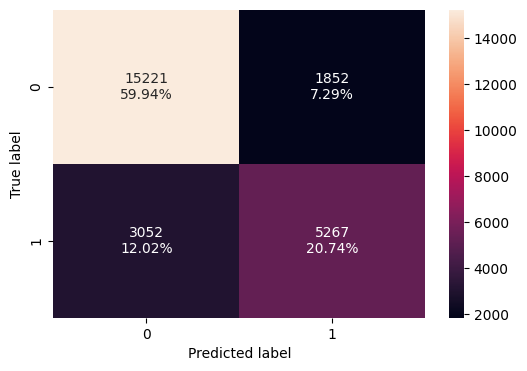

In [ ]:
plot_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

* The f1_score of Logistic Regression model performance on training set is ~0.68 which is low.

### Checking Logistic Regression model performance on test set

In [ ]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

Accuracy  Recall  Precision      F1
0   0.80391 0.62703    0.73553 0.67696

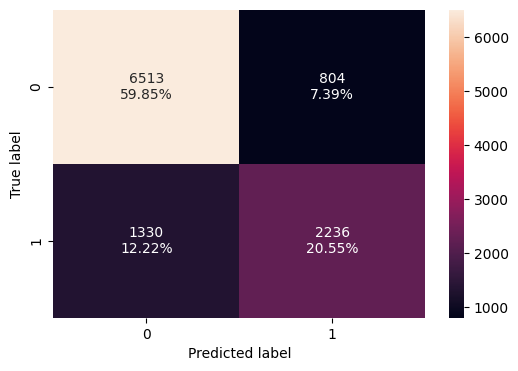

In [ ]:
plot_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

The f1_score of Logistic Regression model performance on test set is ~0.67 which is low.

## Naive - Bayes Classifier

In [ ]:
#Build Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

### Checking Naive - Bayes Classifier performance on training set

In [ ]:
nb_perf_train = model_performance_classification(nb_model, X_train_scaled, y_train)
nb_perf_train

Accuracy  Recall  Precision      F1
0   0.40903 0.96490    0.35297 0.51687

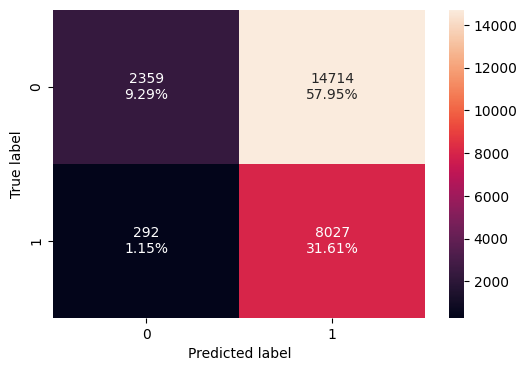

In [ ]:
plot_confusion_matrix(nb_model, X_train_scaled, y_train)

### Checking Naive - Bayes Classifier performance on test set

In [ ]:
nb_perf_test = model_performance_classification(nb_model, X_test_scaled, y_test)
nb_perf_test

Accuracy  Recall  Precision      F1
0   0.40742 0.96411    0.35229 0.51602

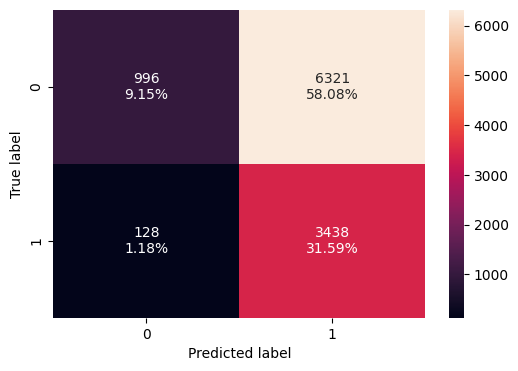

In [ ]:
plot_confusion_matrix(nb_model, X_test_scaled, y_test)

* Naive Bayes achieves very high recall (0.96490) on the training set but at the cost of very low precision (0.35297), resulting in a poor F1 score (0.51687)

* The test set performance is consistent, with high recall (0.96411) but low precision (0.35229) and F1 score (0.51602). This indicates the model predicts most positive cases correctly but makes many false positive predictions.


## KNN Classifier (K = 2)

In order to optimize our model, it's essential to experiment with different values of k to find the most suitable fit for our data. We can commence this process by setting k equal to 3 and gradually exploring other values to assess their impact on the model's performance.

In [ ]:
#Build KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

**Model evaluation criterion**

Model can make wrong predictions as:

* **False Positive:** Predicting a customer canceled the booking but in reality the customer did not canceled the booking.

* **False Negative:** Predicting a customer did not canceled the booking but in reality the customer canceled the booking.

To reduce the losses which might occur due false negative the recall need to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

### Checking KNN Classifier performance on training set

In [ ]:
knn_perf_train = model_performance_classification(knn_model, X_train_scaled, y_train)
knn_perf_train

Accuracy  Recall  Precision      F1
0   0.92198 0.76536    0.99547 0.86538

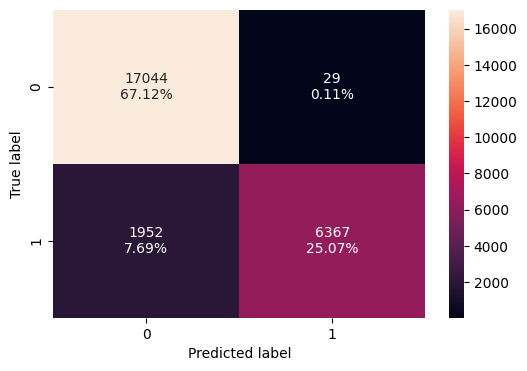

In [ ]:
plot_confusion_matrix(knn_model, X_train_scaled, y_train)

### Checking KNN Classifier performance on test set

In [ ]:
knn_perf_test = model_performance_classification(knn_model, X_test_scaled, y_test)

knn_perf_test

Accuracy  Recall  Precision      F1
0   0.84434 0.63208    0.85508 0.72686

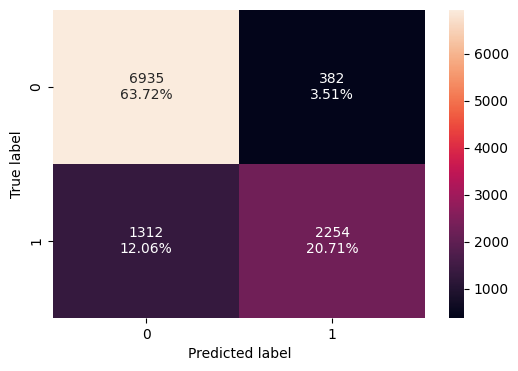

In [ ]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test)

* KNN Classifier (K=2) achieves high Accuracy (0.92198) and high precision on the training set but with low recall (0.76536).

* KNN Classifier (K=2) on test set achieves even more poor values in all parameters.


## Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Model evaluation criterion**

Model can make wrong predictions as:

* **False Positive:** Predicting a customer canceled the booking but in reality the customer did not canceled the booking.

* **False Negative:** Predicting a customer did not canceled the booking but in reality the customer canceled the booking.

To reduce the losses which might occur due false negative the recall need to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

### Checking Decision Tree Classifier performance on training set

In [ ]:
decision_tree_perf_train = model_performance_classification(dt_model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99437 0.98570    0.99708 0.99136

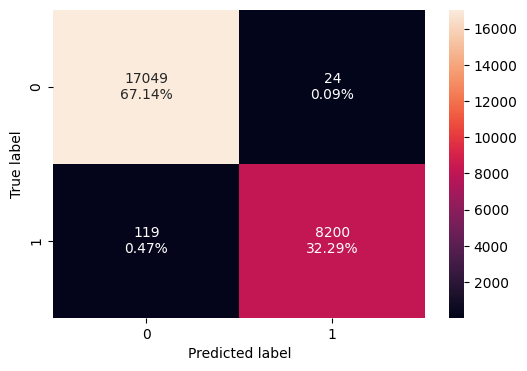

In [ ]:
plot_confusion_matrix(dt_model, X_train, y_train)

The model is giving a generalized result now since the recall scores on the training set is 0.98 which shows that the model is able to generalize well on unseen data.

### Checking Decision Tree Classifier performance on test set

In [ ]:
decision_tree_perf_test = model_performance_classification(dt_model, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86539 0.79501    0.79434 0.79467

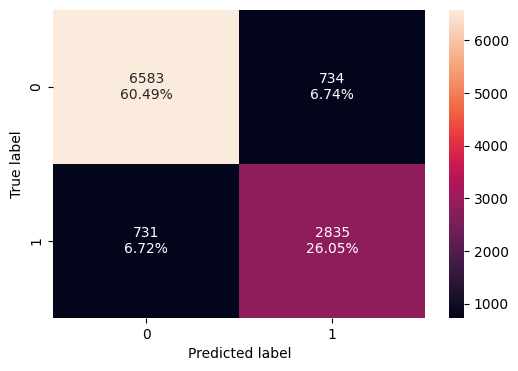

In [ ]:
plot_confusion_matrix(dt_model, X_test, y_test)

The recall scores on the test set is 0.79 which is low.

# **Model Performance Improvement**

## Logistic Regression (deal with multicollinearity, remove high p-value variables, determine optimal threshold using ROC curve)

### Logistic Regression - Dealing with Multicollinearity

* There are some attributes which have high p-values. But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values, for which we are using VIF

In [ ]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [ ]:
# Call the function to calculate VIF for the X_train data with intercept

vif_result = calculate_vif(X_train_with_intercept)

print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                Variable      VIF
0                                  const  1.00000
1                           no_of_adults  1.34506
2                         no_of_children  2.00721
3                   no_of_weekend_nights  1.06725
4                      no_of_week_nights  1.09437
5             required_car_parking_space  1.03494
6                              lead_time  1.40192
7                           arrival_year  1.43326
8                          arrival_month  1.27740
9                           arrival_date  1.00763
10                        repeated_guest  1.75019
11          no_of_previous_cancellations  1.32201
12  no_of_previous_bookings_not_canceled  1.57086
13                    avg_price_per_room  2.03263
14                no_of_special_requests  1.24723
15         type_of_meal_plan_Meal Plan 2  1.26182
16         type_of_meal_plan_Meal Plan 3  1.00796
17        type_of_meal_plan_Not Selected  1.27921
18        room_type_re

* Most of the variables have VIF values below 5, indicating low to moderate multicollinearity. This suggests that these variables are not highly correlated with each other, which is generally acceptable for a logistic regression model.


* Market_segment_type_Online and market_segment_type_Offline exhibit very high VIF values (69.47 and 62.51, respectively). This indicates severe multicollinearity, meaning these variables are highly correlated with other predictors in the model. Such high VIFs could lead to instability in the regression coefficients and unreliable statistical inferences.
* Market_segment_type_Corporate also has a high VIF (16.63), indicating a significant degree of multicollinearity that should be addressed.

* The high VIF values for certain market segments suggest that the model may benefit from refinement.

* Variables such as no_of_adults, no_of_children, lead_time, avg_price_per_room, and no_of_special_requests have VIFs around or below 2, indicating that multicollinearity is not a significant issue for these predictors.

* The presence of high VIF values in some predictors means that careful consideration is required when interpreting the model coefficients. Multicollinearity can distort the estimated effect sizes and make the model more sensitive to changes in the data.

In [ ]:
# Removing the variables with high VIF Score

# Dropping columns with VIF > 5 iteratively
while vif_result['VIF'].max() > 5:
    high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
    print(f"Dropping {high_vif_column} due to high VIF")

    # Check if the column exists before dropping
    if high_vif_column in X_train_with_intercept.columns:
        X_train_with_intercept.drop(columns=high_vif_column, inplace=True)
    if high_vif_column in X_test_with_intercept.columns:
        X_test_with_intercept.drop(columns=high_vif_column, inplace=True)

    vif_result = calculate_vif(X_train_with_intercept)

Dropping market_segment_type_Online due to high VIF


In [ ]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_with_intercept)  ## Complete the code to calculate VIF for the X_train data with intercept

print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                Variable     VIF
0                                  const 1.00000
1                           no_of_adults 1.32868
2                         no_of_children 2.00631
3                   no_of_weekend_nights 1.06689
4                      no_of_week_nights 1.09377
5             required_car_parking_space 1.03486
6                              lead_time 1.39751
7                           arrival_year 1.43053
8                          arrival_month 1.27629
9                           arrival_date 1.00760
10                        repeated_guest 1.74705
11          no_of_previous_cancellations 1.32192
12  no_of_previous_bookings_not_canceled 1.57053
13                    avg_price_per_room 2.03183
14                no_of_special_requests 1.24244
15         type_of_meal_plan_Meal Plan 2 1.26149
16         type_of_meal_plan_Meal Plan 3 1.00796
17        type_of_meal_plan_Not Selected 1.27711
18        room_type_reserved_Room_Type 2 

### Dealing with high p-value variables

* Now, none of the variables exhibit high multicollinearity, so the values in the summary are reliable.
* Let's remove the insignificant features (p-value>0.05).

In [ ]:
print(LogisticReg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                  0.3322
Time:                        23:26:24   Log-Likelihood:                -10724.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.8366   5650.480     -0.000      1.000   -1.11e+04    1.11e+04
no_of_adults                             0.0172      

* Sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:

  * Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  * Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  * Repeat the above two steps till there are no columns with p-value > 0.05.

In [ ]:
# initial list of columns
predictors = X_train_with_intercept.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = SM.Logit(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    print(f"Dropping column {feature_with_p_max} with p-value: {max_p_value}")

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

         Current function value: 0.422351
         Iterations: 35
Dropping column type_of_meal_plan_Meal Plan 3 with p-value: 0.9980150695782412
         Current function value: 0.422397
         Iterations: 35
Dropping column market_segment_type_Complementary with p-value: 0.9992827631449706
Optimization terminated successfully.
         Current function value: 0.422726
         Iterations 14
Dropping column room_type_reserved_Room_Type 3 with p-value: 0.6364426313053448
Optimization terminated successfully.
         Current function value: 0.422730
         Iterations 14
Dropping column no_of_adults with p-value: 0.3609476030123061
Optimization terminated successfully.
         Current function value: 0.422747
         Iterations 14
Dropping column no_of_children with p-value: 0.22457607399865176
Optimization terminated successfully.
         Current function value: 0.422775
         Iterations 14
Dropping column no_of_previous_bookings_not_canceled with p-value: 0.1254982251630327
O

In [ ]:
X_train_significant = X_train_with_intercept[selected_features]
X_test_significant = X_test_with_intercept[selected_features]
X_train_significant.head(10)

const  no_of_weekend_nights  no_of_week_nights  \
0 1.00000               1.36966            0.56582   
1 1.00000              -0.92806            0.56582   
2 1.00000              -0.92806            0.56582   
3 1.00000               0.22080           -0.85577   
4 1.00000               0.22080           -0.14497   
5 1.00000               1.36966           -0.14497   
6 1.00000               0.22080           -0.14497   
7 1.00000              -0.92806           -0.14497   
8 1.00000              -0.92806            0.56582   
9 1.00000              -0.92806           -0.14497   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                    -0.18176   -0.93121       0.46805        1.49258   
1                    -0.18176    0.01057       0.46805        1.49258   
2                    -0.18176    0.23148       0.46805       -0.78256   
3                    -0.18176   -0.00106       0.46805        1.49258   
4                    -0.18176    2.60336       0.46805       -0.78256   
5                    -0.18176   -0.59403       0.46805        1.49258   
6                    -0.18176   -0.97772       0.46805       -0.45754   
7                    -0.18176    2.39408       0.46805        0.19250   
8                    -0.18176    1.15000       0.46805        0.84254   
9                    -0.18176    3.03356       0.46805        0.51752   

   repeated_guest  no_of_previous_cancellations  avg_price_per_room  \
0        -0.16221                      -0.06242             0.35947   
1        -0.16221                      -0.06242             0.53029   
2        -0.16221                      -0.06242             0.39648   
3        -0.16221                      -0.06242            -0.15298   
4        -0.16221                      -0.06242            -0.06757   
5        -0.16221                      -0.06242            -0.23270   
6        -0.16221                      -0.06242            -0.80778   
7        -0.16221                      -0.06242             0.33100   
8        -0.16221                      -0.06242            -0.06615   
9        -0.16221                      -0.06242             0.33100   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                 0.48448                       -0.31620   
1                -0.78822                       -0.31620   
2                -0.78822                       -0.31620   
3                -0.78822                       -0.31620   
4                -0.78822                        3.16255   
5                -0.78822                       -0.31620   
6                 0.48448                       -0.31620   
7                -0.78822                        3.16255   
8                -0.78822                       -0.31620   
9                 0.48448                        3.16255   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                        -0.40605                        -0.13673   
1                        -0.40605                        -0.13673   
2                        -0.40605                        -0.13673   
3                        -0.40605                        -0.13673   
4                        -0.40605                        -0.13673   
5                        -0.40605                        -0.13673   
6                        -0.40605                        -0.13673   
7                        -0.40605                        -0.13673   
8                        -0.40605                         7.31364   
9                        -0.40605                        -0.13673   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                        -0.44829                        -0.08354   
1                        -0.44829                        -0.08354   
2                        -0.44829                        -0.08354   
3                        -0.44829                        -0.08354   
4                        -0.44829                        

### Training the Logistic Regression model again with only the significant features

In [ ]:
LogisticReg_tuned = SM.Logit(y_train, X_train_significant).fit()
print(LogisticReg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.422990
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                  0.3312
Time:                        23:26:27   Log-Likelihood:                -10741.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1787      0.024    -50.100     

* Now no feature has p-value greater than 0.05, so we'll consider the features in LogisticReg_tuned as the final trained model.

### Determining optimal threshold using ROC Curve

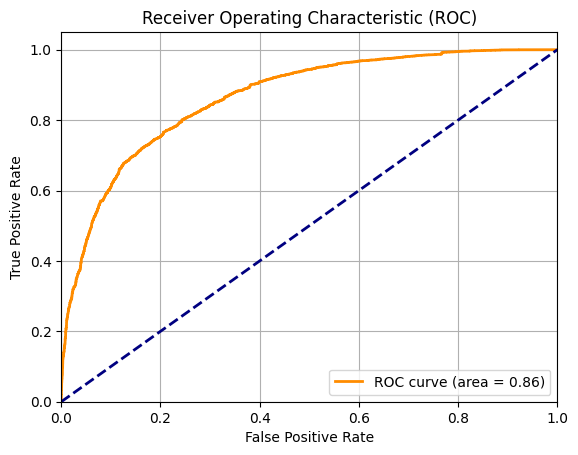

In [ ]:
y_pred = LogisticReg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

The ROC-AUC Score is 0.86 which is fairly good.

In [ ]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.333


### Checking tuned Logistic Regression model performance on training set

In [ ]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit
)
logistic_reg_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.78434 0.76608    0.64354 0.69948

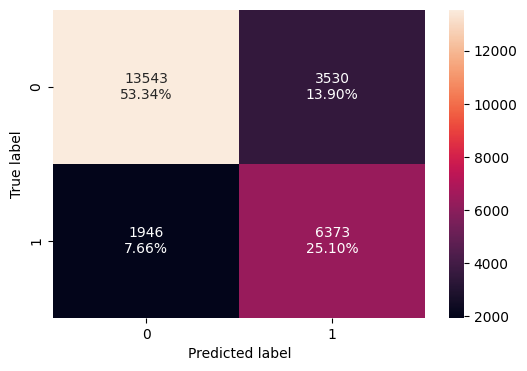

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit)

* Accuracy has decreased from 0.80 to 0.78.
* Precision has decreased from 0.73 to 0.64.
* Model is giving a recall of 0.76 as compared to initial model which was giving a recall of 0.63.
* F1 score has improve from 0.68 to 0.69.


* Accuracy has decreased from 0.80 to 0.78
* Precision has decreased from 0.73 to 0.64.
* Model is giving a recall of 0.76 as compared to initial model which was giving a recall of 0.63.
* F1 score has improve from 0.68 to 0.69.

### Checking tuned Logistic Regression model performance on test set

In [ ]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit
)

logistic_reg_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.77846 0.76612    0.63402 0.69384

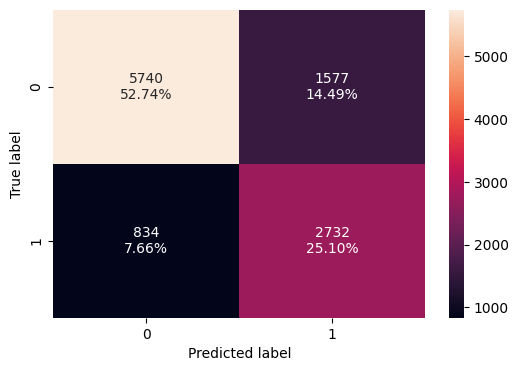

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit)

* Accuracy has decreased from 0.80 to 0.77.
* Precision has decreased from 0.73 to 0.63.
* Model is giving a recall of 0.76 as compared to initial model which was giving a recall of 0.62.
* F1 score has improve from 0.67 to 0.69.
* The changes in both training sets and test sets is moreover similar


* Accuracy has decreased from 0.80 to 0.77
* Precision has decreased from 0.73 to 0.63.
* Model is giving a recall of 0.76 as compared to initial model which was giving a recall of 0.62.
* F1 score has improve from 0.67 to 0.69.
* The changes in both training sets and test sets is moreover similar.

## KNN Classifier (different values of K)

### KNN Classifier Performance Improvement using different k values

Let's run the KNN with no of neighbours to be 2 to 20 and finding the optimal number of neighbours from the above list using the recall score.

In [ ]:
# Define the range for k values
k_values = range(2, 21)

# Initialize variables to store the best k and the highest recall score
best_k = 0
best_recall = 0

# Loop through each k value
for k in k_values:
    # Create and fit the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

    # Print the recall score for the current k value
    print(f'Recall for k={k}: {recall}')

    # Update the best k and best recall score if the current recall is higher
    if recall > best_recall:
        best_recall = recall
        best_k = k

# Print the best k value and its recall score
print(f'\nThe best value of k is: {best_k} with a recall of: {best_recall}')

Recall for k=2: 0.6320807627593943
Recall for k=3: 0.7372406057206955
Recall for k=4: 0.6581604038137969
Recall for k=5: 0.7254627033090297
Recall for k=6: 0.6676948962422883
Recall for k=7: 0.7212563095905776
Recall for k=8: 0.6758272574312956
Recall for k=9: 0.715086932136848
Recall for k=10: 0.6741446999439148
Recall for k=11: 0.7128435221536736
Recall for k=12: 0.6814357823892316
Recall for k=13: 0.7153673583847449
Recall for k=14: 0.6819966348850253
Recall for k=15: 0.704991587212563
Recall for k=16: 0.6797532249018509
Recall for k=17: 0.7058328659562535
Recall for k=18: 0.6811553561413348
Recall for k=19: 0.7030286034772855
Recall for k=20: 0.6786315199102636

The best value of k is: 3 with a recall of: 0.7372406057206955


In [ ]:
# Building KNN model with nummber of neighbors as best_k
knn_tuned = KNeighborsClassifier(n_neighbors = best_k)
knn_tuned.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Checking tuned KNN model performance on training set

In [ ]:
knn_tuned_perf_train = model_performance_classification(knn_tuned, X_train_scaled, y_train)
knn_tuned_perf_train

Accuracy  Recall  Precision      F1
0   0.91513 0.84806    0.88787 0.86751

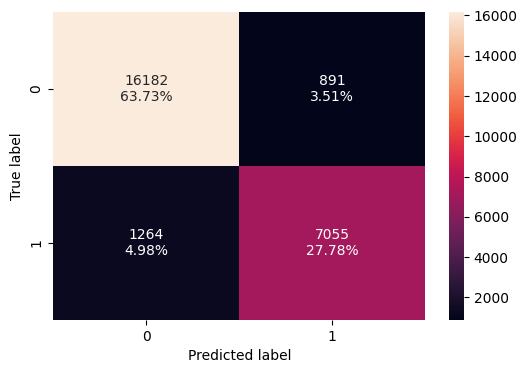

In [ ]:
plot_confusion_matrix(knn_tuned, X_train_scaled, y_train)

### Checking tuned KNN model performance on test set

In [ ]:
knn_tuned_perf_test = model_performance_classification(knn_tuned, X_test_scaled, y_test)
knn_tuned_perf_test

Accuracy  Recall  Precision      F1
0   0.84416 0.73724    0.77597 0.75611

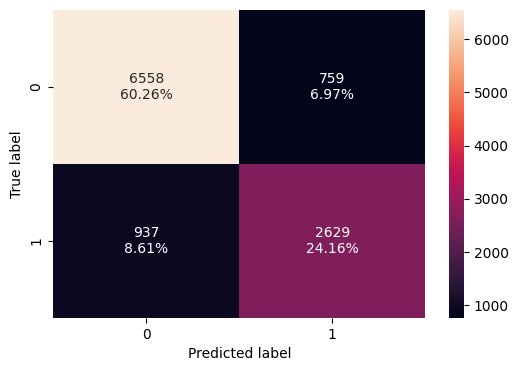

In [ ]:
plot_confusion_matrix(knn_tuned, X_test_scaled, y_test)

* The tuned KNN model shows excellent performance with high accuracy (0.92198), precision (0.99547), recall (0.76536), and F1 score (0.86538). The base model is far behind.

* On the test set, the tuned KNN maintains high accuracy (0.84434) and precision (0.85508), but recall drops (0.63208), leading to a lower F1 score (0.72686).


## Decision Tree Classifier (pre-pruning)

### Pre-pruning the tree

The decision tree is quite deep and complex, indicating that the model is likely fitting the training data with many decisions. This level of complexity may result in overfitting, where the model captures noise in the data rather than the general patterns. Pruning could be considered to simplify the model and enhance generalization.

**Using GridSearch for Hyperparameter tuning of our tree model**

* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifier.
dt_model_tuned = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),                          ## Max Depth of the decision tree
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],               ## Maximum number of leaf nodes
    "min_samples_split": [2, 5, 7, 10, 20, 30],                ## Minimum number of samples required to split an internal node
    "class_weight": ['balanced', None]                         ## whether or not to used balanced weights for impurity computations
}

# # Type of scoring used to compare parameter combinations
# acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=11,
                       max_leaf_nodes=100, random_state=42)

### Checking tuned Decision Tree Classifier performance on training set

In [ ]:
decision_tree_tuned_perf_train = model_performance_classification(dt_model_tuned, X_train, y_train)  ## Complete the code to get model performance on training data
decision_tree_tuned_perf_train

Accuracy  Recall  Precision      F1
0   0.86354 0.84000    0.76606 0.80133

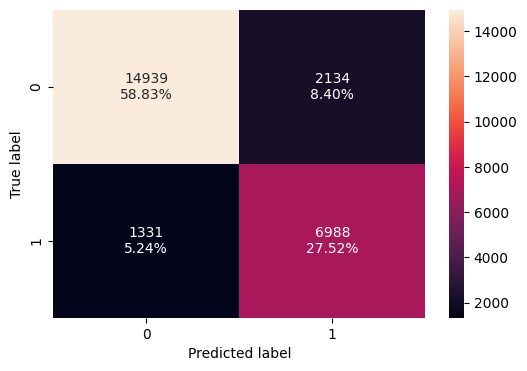

In [ ]:
plot_confusion_matrix(dt_model_tuned, X_train, y_train)  ## Complete the code to create confusion matrix for training data

### Checking tuned Decision Tree Classifier performance on test set

In [ ]:
decision_tree_tuned_perf_test = model_performance_classification(dt_model_tuned, X_test, y_test)  ## Complete the code to get model performance on test data
decision_tree_tuned_perf_test

Accuracy  Recall  Precision      F1
0   0.85427 0.82025    0.75581 0.78671

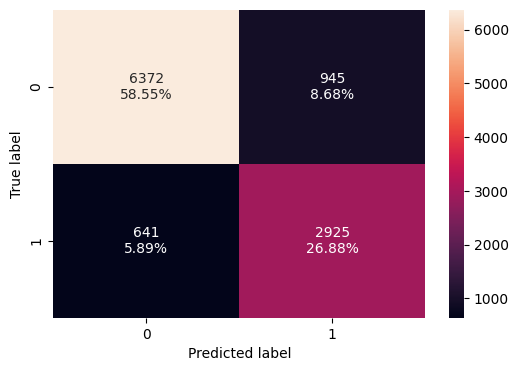

In [ ]:
plot_confusion_matrix(dt_model_tuned, X_test, y_test)  ## Complete the code to create confusion matrix for test data

* On the training set, the tuned decision tree significantly reduces overfitting, balancing out accuracy (0.86354), recall (0.84000), and precision (0.76606), with a solid F1 score (0.80133).  

* On the test set, the tuned decision tree has high accuracy (0.85427), recall (0.82025), and F1 score (0.78671), outperforming most other models.


### Visualizing the Decision Tree

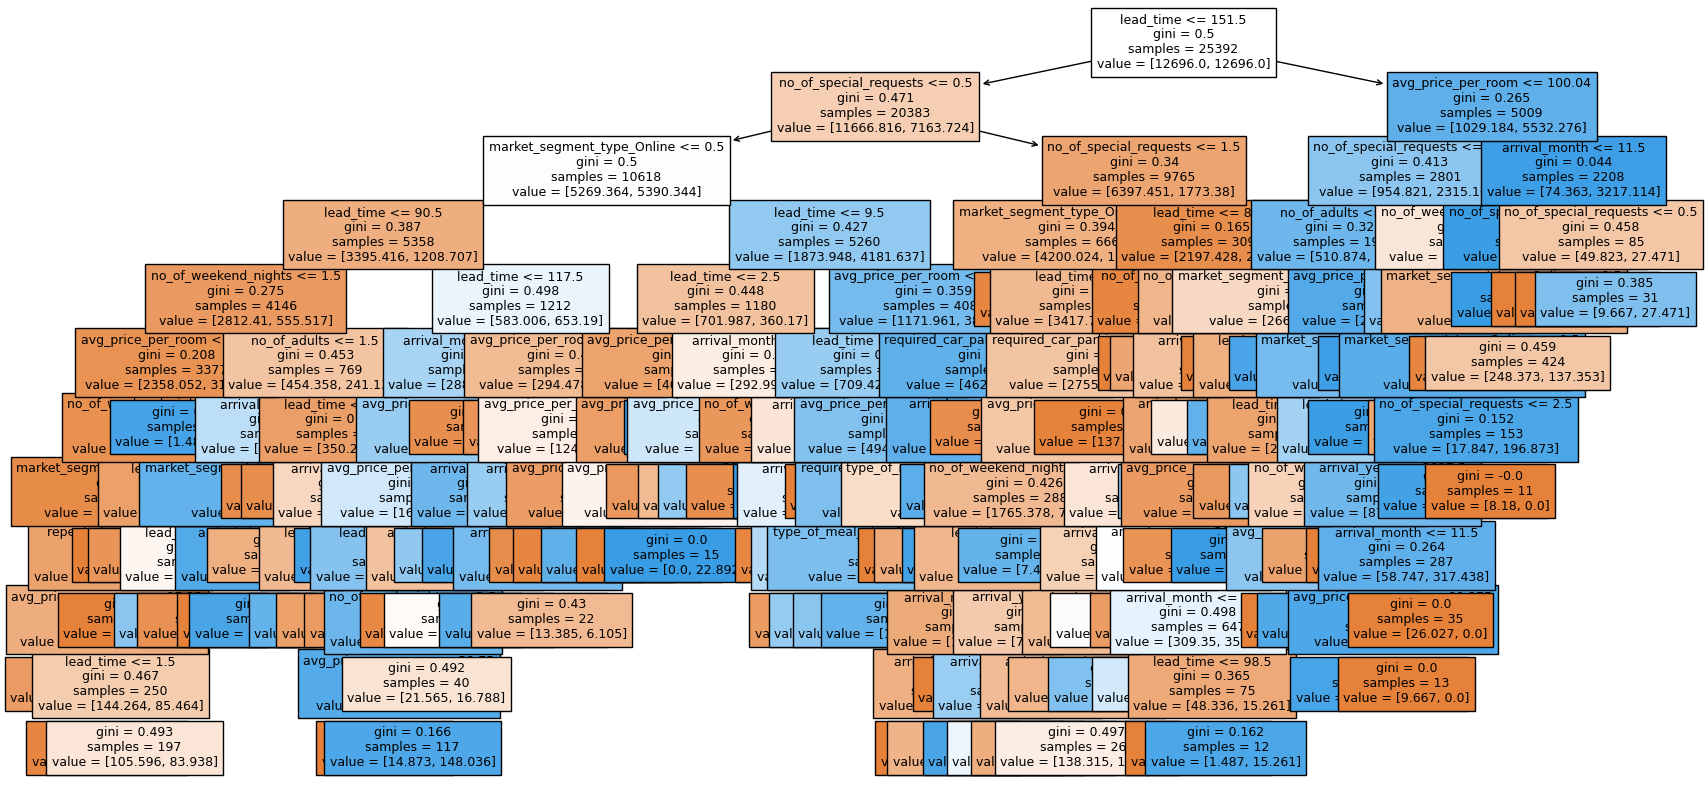

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dt_model_tuned,feature_names=X_train.columns.tolist(),show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 87.25
|   |   |   |   |   |   |   |   |   |   |--- weights: [261.01, 56.47] class: 0
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  87.25
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [38.67, 1.53] class: 0
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [105.60, 83.94] class: 0
|   |   |   |   |   |   |   |   |--- repeated_guest >

### Analyzing Feature Importance for tuned Decision Tree Classifier

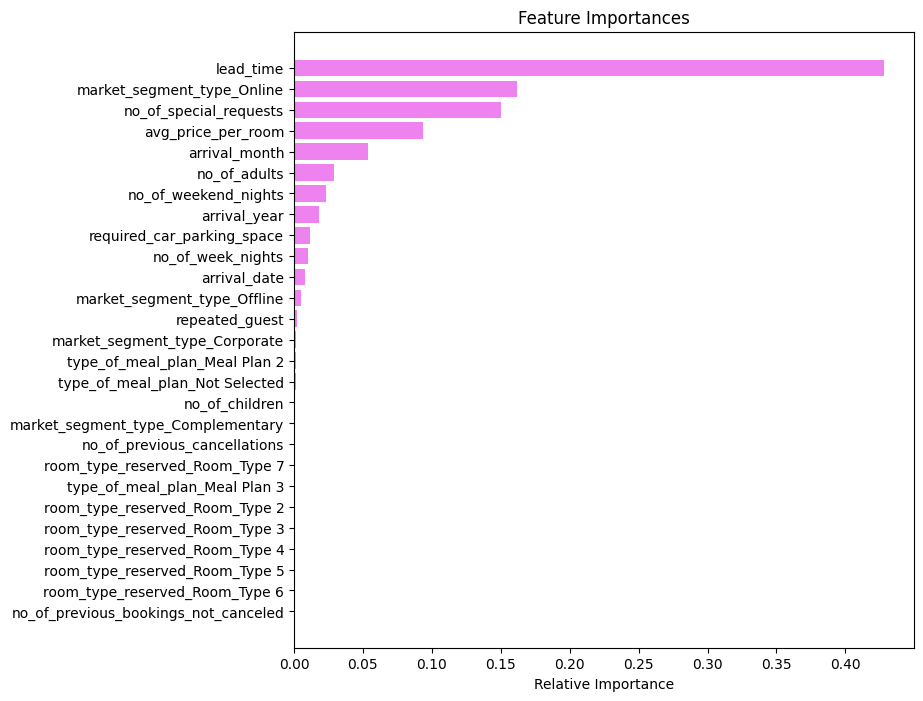

In [ ]:
# Uncomment and run to check feature importance for Tuned Decision Tree model


# # importance of features in the tree building

feature_names = X_train.columns.tolist()
importances = dt_model_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The first split of the decision tree is based on lead_time <= 151.5 days. This indicates that lead time (the time between booking and check-in) is the most significant factor influencing the target outcome (likely cancellation or booking status).

* As seen from multiple splits, lower lead times (<= 90.5, <= 9.5, <= 2.5) significantly impact the model's decision-making process, suggesting customers who book closer to their stay are less likely to cancel.

* A high number of special requests reduces the likelihood of cancellation (fewer cancellations when no_of_special_requests > 0.5). This could indicate that customers who invest time in making specific requests are more committed to their booking.

* The feature avg_price_per_room also appears in multiple splits. Higher prices tend to result in more cancellations (avg_price_per_room > 100), which could indicate that customers are price-sensitive and more likely to cancel expensive bookings.

* Customers booking through online channels (market_segment_type_Online) seem to exhibit different cancellation behaviors than those who book via other means.



# **Model Performance Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_train.T,
        knn_perf_train.T,
        knn_tuned_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tuned_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression Base  Logistic Regression Tuned  \
Accuracy                    0.80687                    0.78434   
Recall                      0.63313                    0.76608   
Precision                   0.73985                    0.64354   
F1                          0.68234                    0.69948   

           Naive Bayes Base  KNN Base  KNN Tuned  Decision Tree Base  \
Accuracy            0.40903   0.92198    0.91513             0.99437   
Recall              0.96490   0.76536    0.84806             0.98570   
Precision           0.35297   0.99547    0.88787             0.99708   
F1                  0.51687   0.86538    0.86751             0.99136   

           Decision Tree Tuned  
Accuracy               0.86354  
Recall                 0.84000  
Precision              0.76606  
F1                     0.80133

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_test.T,
        knn_perf_test.T,
        knn_tuned_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tuned_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression Base  Logistic Regression Tuned  \
Accuracy                    0.80687                    0.78434   
Recall                      0.63313                    0.76608   
Precision                   0.73985                    0.64354   
F1                          0.68234                    0.69948   

           Naive Bayes Base  KNN Base  KNN Tuned  Decision Tree Base  \
Accuracy            0.40742   0.84434    0.84416             0.86539   
Recall              0.96411   0.63208    0.73724             0.79501   
Precision           0.35229   0.85508    0.77597             0.79434   
F1                  0.51602   0.72686    0.75611             0.79467   

           Decision Tree Tuned  
Accuracy               0.85427  
Recall                 0.82025  
Precision              0.75581  
F1                     0.78671


* The tuned logistic regression model improves recall, indicating better handling of imbalanced classes, but sacrifices some accuracy and precision.

* Naive Bayes may not be the best choice due to its extremely low precision despite high recall.

* The KNN tuned model performs very well on the training set and test set but suffers from lower recall on the test set. This suggests some overfitting and a potential issue with generalization.

* The decision tree model, after tuning, provides a good balance of all metrics across both training and test sets. It is less overfitted compared to the base model and performs consistently well.





# **Actionable Insights and Recommendations**

* The analysis highlights lead time, booking channel, special requests and average price, arrival month, no. of adults as primary drivers of booking cancellations.

* Canceled bookings tend to have significantly higher lead times compared to those that are not canceled. This suggests that the longer the lead time, the higher the likelihood of cancellation, possibly due to changes in travel plans over time.

* The overwhelming dominance of the Online segment suggests that any business strategies should prioritize enhancing and optimizing the online booking experience. This could include improving website usability, mobile app functionality, and digital marketing efforts.

* October, the busiest month with the most cancellations, hotels could offer incentives like discounts and flexible booking options to encourage guests to maintain their reservations.

* Repeated guests rarely cancel their bookings, it would be beneficial for hotels to focus on increasing the number of loyal customers. This can be achieved by developing loyalty programs that offer rewards for returning guests.

* Customers with specific requests are less likely to cancel. By customizing services to meet these unique needs, hotels can enhance customer satisfaction and booking reliability.

* Among the models evaluated, Tuned Decision Tree seems to be the best model having higher recall, precision, accuracy scores for the training set and in test sets have moderate good scores. Higher recall indicates more effective at correctly identifying likelihood of booking cancellation compared to other models.

* Good recall performance indicates its effectiveness in minimizing false negatives, which is critical for reducing booking cancellations.


* INN Hotel Group should integrate the Tuned Decision Tree model into their operational workflow as part of a comprehensive predictive maintenance system. By leveraging this model, the company can proactively detect the chances of a booking to be canceled which will help in minimizing the company’s loss oc	cured due to booking cancellation.


# Conclusion

The analysis highlights several opportunities to enhance no. of booking and reduce booking cancellation. By focusing on online market segment with repeated customer, low lead time bookings, improving customer services, and aligning deals and discount during festive season or vacation time, the business can achieve sustainable growth and improved customer satisfaction which will ultimately reduce cancellations. These strategies, coupled with personalized customer engagement and leveraging seasonal trends, will enable the company to maximize its revenue potential and reduce cancellation booking.


The above data-driven insights, will help the INN Hotels Group to develop more targeted strategies to manage cancellations and improve customer retention, thereby improving revenue stability and operational efficiency.
